# 옵티마이저

In [ ]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

# 필요한 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 텐서플로우 라이브러리에서 케라스 패키지 불러오기
from tensorflow import keras

## fashion mnist 데이터

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
(X_train, y_train), (X_test, y_test)

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
print(X_train.shape, y_train.shape)
# 이미지 6 만장, 가로 * 세로

(60000, 28, 28) (60000,)


In [ ]:
print(X_test.shape, y_test.shape)
# 이미지 1 만장, 가로 * 세로

(10000, 28, 28) (10000,)


In [ ]:
# 표준화
X_train_scale = X_train / 255

In [ ]:
X_train_scale.shape

(60000, 28, 28)

In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_train_scale_sub, X_train_scale_val, y_train_sub, y_train_val = train_test_split(X_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)

### 기본 경사 하강법 옵티마이저

In [ ]:
# 모델 생성을 함수로 만들기
def create_dnn_model():
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28,28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model

In [ ]:
model = create_dnn_model()

In [ ]:
sgd = keras.optimizers.SGD()

In [ ]:
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7750 - accuracy: 0.7508
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5363 - accuracy: 0.8188
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4892 - accuracy: 0.8313
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4609 - accuracy: 0.8410
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4420 - accuracy: 0.8479


In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

375/375 [==============================] - 1s 2ms/step - loss: 0.4480 - accuracy: 0.8438


[0.44799450039863586, 0.843833327293396]

### 학습률 변경

In [ ]:
# 학습률 증가
model = create_dnn_model()

In [ ]:
sgd = keras.optimizers.SGD(learning_rate = 0.1)

In [ ]:
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5612 - accuracy: 0.7977
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4132 - accuracy: 0.8492
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3757 - accuracy: 0.8629
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3499 - accuracy: 0.8717
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3320 - accuracy: 0.8771


In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

375/375 [==============================] - 1s 3ms/step - loss: 0.3736 - accuracy: 0.8648


[0.37359994649887085, 0.8647500276565552]

In [ ]:
# 학습률 감소
model = create_dnn_model()

In [ ]:
sgd = keras.optimizers.SGD(learning_rate = 0.001)

In [ ]:
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 8s 4ms/step - loss: 1.5313 - accuracy: 0.5476
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.9652 - accuracy: 0.6985
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8107 - accuracy: 0.7393
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7335 - accuracy: 0.7656
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6839 - accuracy: 0.7812


In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

375/375 [==============================] - 1s 2ms/step - loss: 0.6766 - accuracy: 0.7819


[0.6765778064727783, 0.7819166779518127]

### 모멘텀

In [ ]:
model = create_dnn_model()

In [ ]:
sgd = keras.optimizers.SGD(momentum = 0.9)

In [ ]:
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 13s 7ms/step - loss: 0.5571 - accuracy: 0.8041
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4091 - accuracy: 0.8534
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3725 - accuracy: 0.8647
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3508 - accuracy: 0.8726
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3294 - accuracy: 0.8788


In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

375/375 [==============================] - 1s 3ms/step - loss: 0.3503 - accuracy: 0.8727


[0.350338876247406, 0.8727499842643738]

### 네스테로프 모멘텀

In [ ]:
model = create_dnn_model()

In [ ]:
sgd = keras.optimizers.SGD(momentum = 0.9, nesterov = True)

In [ ]:
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 12s 6ms/step - loss: 0.5354 - accuracy: 0.8129
Epoch 2/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4034 - accuracy: 0.8556
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3701 - accuracy: 0.8652
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3489 - accuracy: 0.8732
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3279 - accuracy: 0.8799


In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

375/375 [==============================] - 1s 2ms/step - loss: 0.3584 - accuracy: 0.8711


[0.3583715558052063, 0.8710833191871643]

### 적응적 학습률 옵티마이저

In [ ]:
model = create_dnn_model()

In [ ]:
adagrad = keras.optimizers.Adagrad()

In [ ]:
model.compile(optimizer = adagrad, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1.1522 - accuracy: 0.6490
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7729 - accuracy: 0.7503
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.6862 - accuracy: 0.7763
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6390 - accuracy: 0.7933
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6078 - accuracy: 0.8024


In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

375/375 [==============================] - 1s 2ms/step - loss: 0.6078 - accuracy: 0.8008


[0.6078113317489624, 0.8007500171661377]

#### RMSProp

In [ ]:
model = create_dnn_model()

In [ ]:
rmsprop = keras.optimizers.RMSprop()

In [ ]:
model.compile(optimizer = rmsprop, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5377 - accuracy: 0.8109
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3987 - accuracy: 0.8558
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3596 - accuracy: 0.8713
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3368 - accuracy: 0.8816
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3184 - accuracy: 0.8856


In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

375/375 [==============================] - 1s 2ms/step - loss: 0.3637 - accuracy: 0.8739


[0.3637124001979828, 0.8739166855812073]

#### Adam

In [ ]:
model = create_dnn_model()

In [ ]:
adam = keras.optimizers.Adam()

In [ ]:
model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5275 - accuracy: 0.8160
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3957 - accuracy: 0.8593
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3596 - accuracy: 0.8691
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3330 - accuracy: 0.8790
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3117 - accuracy: 0.8848


In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

375/375 [==============================] - 1s 2ms/step - loss: 0.3474 - accuracy: 0.8727


[0.34736379981040955, 0.8727499842643738]

## iris 데이터

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# X, y 분할
X = df.drop('species', axis = 1).values
y = df['species'].values

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (150, 4)
y 데이터:  (150,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_label = label_encoder.fit_transform(y)

In [ ]:
print(y)
print(y_label)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

In [ ]:
y = y_label

In [ ]:
# 훈련/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=42)
print("훈련데이터: ", X_train.shape)
print("테스트데이터: ", X_test.shape)

훈련데이터:  (120, 4)
테스트데이터:  (30, 4)


In [ ]:
# 표준화(z점수)
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)
print(X_train_scale[:5])
print(X_test_scale[:5])

[[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]
 [ 1.08589829  0.08570939  0.38585821  0.28921757]
 [-1.23014297  0.75647855 -1.2187007  -1.31260282]
 [-1.7177306   0.30929911 -1.39061772 -1.31260282]]
[[ 0.35451684 -0.58505976  0.55777524  0.02224751]
 [-0.13307079  1.65083742 -1.16139502 -1.17911778]
 [ 2.30486738 -1.0322392   1.8185001   1.49058286]
 [ 0.23261993 -0.36147005  0.44316389  0.4227026 ]
 [ 1.2077952  -0.58505976  0.61508092  0.28921757]]


In [ ]:
# 훈련/검증 데이터 분할
from sklearn.model_selection import train_test_split
X_train_scale_sub, X_train_scale_val, y_train_sub, y_train_val = train_test_split(X_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)
print("훈련전체데이터: ", X_train_scale.shape)
print("훈련서브데이터: ", X_train_scale_sub.shape)
print("검증데이터: ", X_train_scale_val.shape)

훈련전체데이터:  (120, 4)
훈련서브데이터:  (96, 4)
검증데이터:  (24, 4)


### 기본경사하강법

In [ ]:
# 모델 만들기
def create_dnn_model():
  model = keras.Sequential()
  model.add(keras.layers.Dense(100, activation = 'relu', input_shape = (4,)))
  model.add(keras.layers.Dense(3, activation = 'softmax'))
  return model

In [ ]:
model = create_dnn_model()

In [ ]:
sgd = keras.optimizers.SGD()

In [ ]:
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 8ms/step - loss: 0.9707 - accuracy: 0.6979
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 0.9467 - accuracy: 0.7083
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 0.9241 - accuracy: 0.7083
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 0.9028 - accuracy: 0.6979
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8828 - accuracy: 0.6979
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8637 - accuracy: 0.7292
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8463 - accuracy: 0.7396
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8292 - accuracy: 0.7604
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8133 - accuracy: 0.7708
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 0.7981 - accuracy: 0.7708
Epoch 11/100
3/3 [===========

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 329ms/step - loss: 0.4681 - accuracy: 0.8333


[0.46807631850242615, 0.8333333134651184]

### 학습률 변경

In [ ]:
# 학습률 증가
model = create_dnn_model()

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [ ]:
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 0.9287 - accuracy: 0.6771
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7328 - accuracy: 0.8021
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6257 - accuracy: 0.8021
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5573 - accuracy: 0.8021
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5102 - accuracy: 0.8125
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4752 - accuracy: 0.8125
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.4510 - accuracy: 0.8125
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 0.4264 - accuracy: 0.8125
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 0.4082 - accuracy: 0.8125
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3910 - accuracy: 0.8229
Epoch 11/100
3/3 [===========

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 153ms/step - loss: 0.1965 - accuracy: 0.8750


[0.19647233188152313, 0.875]

In [ ]:
# 학습률 감소
model = create_dnn_model()

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.001)

In [ ]:
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 0.9455 - accuracy: 0.6562
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9431 - accuracy: 0.6562
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9408 - accuracy: 0.6562
Epoch 4/100
3/3 [==============================] - 0s 9ms/step - loss: 0.9384 - accuracy: 0.6562
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.9361 - accuracy: 0.6562
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 0.9337 - accuracy: 0.6667
Epoch 7/100
3/3 [==============================] - 0s 13ms/step - loss: 0.9314 - accuracy: 0.6667
Epoch 8/100
3/3 [==============================] - 0s 11ms/step - loss: 0.9291 - accuracy: 0.6667
Epoch 9/100
3/3 [==============================] - 0s 16ms/step - loss: 0.9268 - accuracy: 0.6667
Epoch 10/100
3/3 [==============================] - 0s 14ms/step - loss: 0.9245 - accuracy: 0.6667
Epoch 11/100
3/3 [=====

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 166ms/step - loss: 0.8193 - accuracy: 0.6250


[0.8193095326423645, 0.625]

### 모멘텀

In [ ]:
model = create_dnn_model()

In [ ]:
sgd = keras.optimizers.SGD(momentum = 0.9)

In [ ]:
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 1.1010 - accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9987 - accuracy: 0.6146
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8459 - accuracy: 0.8125
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7077 - accuracy: 0.8021
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6003 - accuracy: 0.8021
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5295 - accuracy: 0.8125
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4806 - accuracy: 0.8125
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4467 - accuracy: 0.8125
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4220 - accuracy: 0.8229
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3986 - accuracy: 0.8229
Epoch 11/100
3/3 [===========

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 221ms/step - loss: 0.2114 - accuracy: 0.8750


[0.21135389804840088, 0.875]

### 네스테로프 모멘텀

In [ ]:
model = create_dnn_model()

In [ ]:
sgd = keras.optimizers.SGD(momentum = 0.9, nesterov = True)

In [ ]:
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 100)

Epoch 1/100
3/3 [==============================] - 2s 6ms/step - loss: 1.1798 - accuracy: 0.2604
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 1.0508 - accuracy: 0.5625
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 0.8902 - accuracy: 0.7708
Epoch 4/100
3/3 [==============================] - 0s 13ms/step - loss: 0.7522 - accuracy: 0.7708
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 0.6426 - accuracy: 0.7604
Epoch 6/100
3/3 [==============================] - 0s 24ms/step - loss: 0.5665 - accuracy: 0.7917
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 0.5125 - accuracy: 0.7917
Epoch 8/100
3/3 [==============================] - 0s 20ms/step - loss: 0.4752 - accuracy: 0.8021
Epoch 9/100
3/3 [==============================] - 0s 15ms/step - loss: 0.4467 - accuracy: 0.8021
Epoch 10/100
3/3 [==============================] - 0s 13ms/step - loss: 0.4195 - accuracy: 0.8125
Epoch 11/100
3/3 [===

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 162ms/step - loss: 0.2062 - accuracy: 0.8750


[0.20623500645160675, 0.875]

### 적응적 학습률 옵티마이저

#### adagrad

In [ ]:
model = create_dnn_model()

In [ ]:
adagrad = keras.optimizers.Adagrad()

In [ ]:
model.compile(optimizer = adagrad, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 0.9796 - accuracy: 0.5521
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9714 - accuracy: 0.5833
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9637 - accuracy: 0.5938
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9564 - accuracy: 0.6146
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9496 - accuracy: 0.6250
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9430 - accuracy: 0.6354
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 0.9369 - accuracy: 0.6354
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9308 - accuracy: 0.6458
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9251 - accuracy: 0.6458
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9195 - accuracy: 0.6458
Epoch 11/100
3/3 [===========

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 149ms/step - loss: 0.8161 - accuracy: 0.5417


[0.816085159778595, 0.5416666865348816]

#### RMSProp

In [ ]:
model = create_dnn_model()

In [ ]:
rmsprop = keras.optimizers.RMSprop()

In [ ]:
model.compile(optimizer = rmsprop, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 1.0284 - accuracy: 0.2500
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8989 - accuracy: 0.7708
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8245 - accuracy: 0.7917
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7681 - accuracy: 0.8021
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.7219 - accuracy: 0.8125
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6826 - accuracy: 0.8125
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6502 - accuracy: 0.8229
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6200 - accuracy: 0.8229
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5940 - accuracy: 0.8229
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 0.5703 - accuracy: 0.8229
Epoch 11/100
3/3 [===========

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 155ms/step - loss: 0.2101 - accuracy: 0.8750


[0.2101350873708725, 0.875]

#### Adam

In [ ]:
model = create_dnn_model()

In [ ]:
adam = keras.optimizers.Adam()

In [ ]:
model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
# model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 1.1962 - accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 1.1209 - accuracy: 0.4792
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 1.0481 - accuracy: 0.5833
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9842 - accuracy: 0.5625
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9221 - accuracy: 0.6979
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8671 - accuracy: 0.7396
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8169 - accuracy: 0.7083
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7758 - accuracy: 0.7708
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7361 - accuracy: 0.7812
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 0.6993 - accuracy: 0.7812
Epoch 11/100
3/3 [===========

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 222ms/step - loss: 0.2397 - accuracy: 0.9167


[0.23974555730819702, 0.9166666865348816]

## wine 데이터

In [ ]:
from sklearn import datasets
data = datasets.load_wine()

In [ ]:
# 특성
data['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
# 타깃
data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [ ]:
df['class'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [ ]:
df['class'].unique()

array([0, 1, 2])

In [ ]:
df['class'].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

In [ ]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [ ]:
# X, y 분할
X = df.drop('class', axis = 1).values
y = df['class'].values

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (178, 13)
y 데이터:  (178,)


In [ ]:
# 훈련/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=42)
print("훈련데이터: ", X_train.shape)
print("테스트데이터: ", X_test.shape)

훈련데이터:  (142, 13)
테스트데이터:  (36, 13)


In [ ]:
# 표준화(z점수)
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)
print(X_train_scale[:5])
print(X_test_scale[:5])

[[ 1.66529275 -0.60840587  1.21896194  1.60540017 -0.16738426  0.80400157
  -0.6916784   1.26722552  1.8775398   3.41947305 -1.65632857 -0.87940904
  -0.24860607]
 [-0.54952506  2.7515415   1.00331502  1.60540017 -0.30437887 -0.78538376
  -1.40123291  2.04959953 -0.87350523 -0.0248012  -0.58463272 -1.25462095
  -0.72992237]
 [-0.74531007 -1.14354109 -0.93750727 -0.28270426 -0.8523573   1.93702874
   1.7467906  -1.00165913  0.58798744 -0.24006834  0.35845962  0.2462267
  -0.24860607]
 [ 0.61294837 -0.61717858  1.00331502  0.87920616 -0.78385999  0.4892718
  -0.90154664  1.18898812  1.17258451  2.8813052  -1.65632857 -1.12955031
  -0.38138298]
 [ 0.11124931 -0.76631462 -0.93750727 -1.15413707 -0.16738426  0.17454204
   0.63748708 -0.68870952 -0.40926638 -0.58449577  0.95860929  0.1350528
   0.94638614]]
[[ 0.80873338  0.63731874  0.71578579 -1.24128036  1.06556722  0.64663669
   1.02724237 -1.54932094  0.08936053  0.01825223  0.01551695  1.06613421
   0.36548715]
 [ 1.50621744  1.4619533

In [ ]:
# 훈련/검증 데이터 분할
from sklearn.model_selection import train_test_split
X_train_scale_sub, X_train_scale_val, y_train_sub, y_train_val = train_test_split(X_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)
print("훈련전체데이터: ", X_train_scale.shape)
print("훈련서브데이터: ", X_train_scale_sub.shape)
print("검증데이터: ", X_train_scale_val.shape)

훈련전체데이터:  (142, 13)
훈련서브데이터:  (113, 13)
검증데이터:  (29, 13)


### 기본경사하강법

In [ ]:
X_train_scale_sub.shape[1]

13

In [ ]:
# 모델 만들기
def create_dnn_model():
  model = keras.Sequential()
  model.add(keras.layers.Dense(50, activation = 'relu', input_shape = (X_train_scale_sub.shape[1],)))
  model.add(keras.layers.Dense(20, activation = 'relu'))
  model.add(keras.layers.Dense(3, activation = 'softmax'))
  return model

In [ ]:
model = create_dnn_model()

In [ ]:
sgd = keras.optimizers.SGD()

In [ ]:
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 20)

Epoch 1/20
4/4 [==============================] - 1s 6ms/step - loss: 1.2698 - accuracy: 0.3009
Epoch 2/20
4/4 [==============================] - 0s 5ms/step - loss: 1.2016 - accuracy: 0.3097
Epoch 3/20
4/4 [==============================] - 0s 5ms/step - loss: 1.1441 - accuracy: 0.3186
Epoch 4/20
4/4 [==============================] - 0s 6ms/step - loss: 1.0967 - accuracy: 0.3363
Epoch 5/20
4/4 [==============================] - 0s 5ms/step - loss: 1.0540 - accuracy: 0.3628
Epoch 6/20
4/4 [==============================] - 0s 6ms/step - loss: 1.0158 - accuracy: 0.3982
Epoch 7/20
4/4 [==============================] - 0s 5ms/step - loss: 0.9824 - accuracy: 0.4602
Epoch 8/20
4/4 [==============================] - 0s 5ms/step - loss: 0.9523 - accuracy: 0.5487
Epoch 9/20
4/4 [==============================] - 0s 5ms/step - loss: 0.9233 - accuracy: 0.6195
Epoch 10/20
4/4 [==============================] - 0s 6ms/step - loss: 0.8966 - accuracy: 0.6991
Epoch 11/20
4/4 [======================

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 247ms/step - loss: 0.7501 - accuracy: 0.7931


[0.7501200437545776, 0.7931034564971924]

### 학습률 변경

In [ ]:
# 학습률 증가
model = create_dnn_model()

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.02)

In [ ]:
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 20)

Epoch 1/20
4/4 [==============================] - 1s 4ms/step - loss: 1.0217 - accuracy: 0.4602
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 0.8858 - accuracy: 0.6018
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 0.7831 - accuracy: 0.8053
Epoch 4/20
4/4 [==============================] - 0s 5ms/step - loss: 0.7000 - accuracy: 0.8673
Epoch 5/20
4/4 [==============================] - 0s 4ms/step - loss: 0.6283 - accuracy: 0.8938
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 0.5680 - accuracy: 0.9115
Epoch 7/20
4/4 [==============================] - 0s 4ms/step - loss: 0.5164 - accuracy: 0.9381
Epoch 8/20
4/4 [==============================] - 0s 4ms/step - loss: 0.4716 - accuracy: 0.9381
Epoch 9/20
4/4 [==============================] - 0s 4ms/step - loss: 0.4327 - accuracy: 0.9381
Epoch 10/20
4/4 [==============================] - 0s 4ms/step - loss: 0.3985 - accuracy: 0.9381
Epoch 11/20
4/4 [======================

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 253ms/step - loss: 0.2529 - accuracy: 0.9310


[0.2528612017631531, 0.931034505367279]

### 모멘텀

In [ ]:
model = create_dnn_model()

In [ ]:
sgd = keras.optimizers.SGD(momentum = 0.9)

In [ ]:
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 20)

Epoch 1/20
4/4 [==============================] - 2s 5ms/step - loss: 1.0754 - accuracy: 0.4248
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 0.8976 - accuracy: 0.7080
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 0.6877 - accuracy: 0.9292
Epoch 4/20
4/4 [==============================] - 0s 4ms/step - loss: 0.5116 - accuracy: 0.9381
Epoch 5/20
4/4 [==============================] - 0s 7ms/step - loss: 0.3724 - accuracy: 0.9558
Epoch 6/20
4/4 [==============================] - 0s 5ms/step - loss: 0.2673 - accuracy: 0.9646
Epoch 7/20
4/4 [==============================] - 0s 6ms/step - loss: 0.1952 - accuracy: 0.9735
Epoch 8/20
4/4 [==============================] - 0s 4ms/step - loss: 0.1445 - accuracy: 0.9823
Epoch 9/20
4/4 [==============================] - 0s 4ms/step - loss: 0.1127 - accuracy: 0.9912
Epoch 10/20
4/4 [==============================] - 0s 4ms/step - loss: 0.0900 - accuracy: 0.9912
Epoch 11/20
4/4 [======================

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 229ms/step - loss: 0.1409 - accuracy: 0.9655


[0.14090102910995483, 0.9655172228813171]

### 네스테로프 모멘텀

In [ ]:
model = create_dnn_model()

In [ ]:
sgd = keras.optimizers.SGD(momentum = 0.9, nesterov = True)

In [ ]:
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 20)

Epoch 1/20
4/4 [==============================] - 1s 4ms/step - loss: 1.1995 - accuracy: 0.2655
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 0.9552 - accuracy: 0.5841
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 0.7282 - accuracy: 0.7699
Epoch 4/20
4/4 [==============================] - 0s 4ms/step - loss: 0.5518 - accuracy: 0.9115
Epoch 5/20
4/4 [==============================] - 0s 4ms/step - loss: 0.4202 - accuracy: 0.9381
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 0.3167 - accuracy: 0.9469
Epoch 7/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2363 - accuracy: 0.9735
Epoch 8/20
4/4 [==============================] - 0s 4ms/step - loss: 0.1790 - accuracy: 0.9735
Epoch 9/20
4/4 [==============================] - 0s 4ms/step - loss: 0.1405 - accuracy: 0.9912
Epoch 10/20
4/4 [==============================] - 0s 4ms/step - loss: 0.1132 - accuracy: 0.9912
Epoch 11/20
4/4 [======================

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 177ms/step - loss: 0.1187 - accuracy: 0.9655


[0.11874628812074661, 0.9655172228813171]

### 적응적 학습률 옵티마이저

#### adagrad

In [ ]:
model = create_dnn_model()

In [ ]:
adagrad = keras.optimizers.Adagrad()

In [ ]:
model.compile(optimizer = adagrad, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 20)

Epoch 1/20
4/4 [==============================] - 1s 4ms/step - loss: 1.2043 - accuracy: 0.4336
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 1.1864 - accuracy: 0.4336
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 1.1713 - accuracy: 0.4336
Epoch 4/20
4/4 [==============================] - 0s 4ms/step - loss: 1.1581 - accuracy: 0.4336
Epoch 5/20
4/4 [==============================] - 0s 4ms/step - loss: 1.1458 - accuracy: 0.4336
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 1.1346 - accuracy: 0.4513
Epoch 7/20
4/4 [==============================] - 0s 4ms/step - loss: 1.1235 - accuracy: 0.4602
Epoch 8/20
4/4 [==============================] - 0s 4ms/step - loss: 1.1131 - accuracy: 0.4602
Epoch 9/20
4/4 [==============================] - 0s 4ms/step - loss: 1.1026 - accuracy: 0.4602
Epoch 10/20
4/4 [==============================] - 0s 4ms/step - loss: 1.0930 - accuracy: 0.4602
Epoch 11/20
4/4 [======================

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 228ms/step - loss: 0.9431 - accuracy: 0.6207


[0.9431211948394775, 0.6206896305084229]

#### RMSProp

In [ ]:
model = create_dnn_model()

In [ ]:
rmsprop = keras.optimizers.RMSprop()

In [ ]:
model.compile(optimizer = rmsprop, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 20)

Epoch 1/20
4/4 [==============================] - 1s 4ms/step - loss: 0.9461 - accuracy: 0.5575
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 0.7963 - accuracy: 0.8142
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.8850
Epoch 4/20
4/4 [==============================] - 0s 4ms/step - loss: 0.6075 - accuracy: 0.9027
Epoch 5/20
4/4 [==============================] - 0s 4ms/step - loss: 0.5320 - accuracy: 0.9292
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 0.4671 - accuracy: 0.9469
Epoch 7/20
4/4 [==============================] - 0s 4ms/step - loss: 0.4107 - accuracy: 0.9381
Epoch 8/20
4/4 [==============================] - 0s 4ms/step - loss: 0.3609 - accuracy: 0.9469
Epoch 9/20
4/4 [==============================] - 0s 4ms/step - loss: 0.3189 - accuracy: 0.9469
Epoch 10/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2828 - accuracy: 0.9469
Epoch 11/20
4/4 [======================

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 177ms/step - loss: 0.1067 - accuracy: 0.9655


[0.10670934617519379, 0.9655172228813171]

#### Adam

In [ ]:
model = create_dnn_model()

In [ ]:
adam = keras.optimizers.Adam()

In [ ]:
model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
# model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.fit(X_train_scale_sub, y_train_sub, epochs = 20)

Epoch 1/20
4/4 [==============================] - 1s 4ms/step - loss: 1.1216 - accuracy: 0.3717
Epoch 2/20
4/4 [==============================] - 0s 4ms/step - loss: 1.0187 - accuracy: 0.4867
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 0.9275 - accuracy: 0.7080
Epoch 4/20
4/4 [==============================] - 0s 4ms/step - loss: 0.8470 - accuracy: 0.8230
Epoch 5/20
4/4 [==============================] - 0s 4ms/step - loss: 0.7747 - accuracy: 0.8938
Epoch 6/20
4/4 [==============================] - 0s 4ms/step - loss: 0.7089 - accuracy: 0.9027
Epoch 7/20
4/4 [==============================] - 0s 4ms/step - loss: 0.6454 - accuracy: 0.9115
Epoch 8/20
4/4 [==============================] - 0s 4ms/step - loss: 0.5882 - accuracy: 0.9381
Epoch 9/20
4/4 [==============================] - 0s 4ms/step - loss: 0.5332 - accuracy: 0.9646
Epoch 10/20
4/4 [==============================] - 0s 4ms/step - loss: 0.4814 - accuracy: 0.9646
Epoch 11/20
4/4 [======================

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 183ms/step - loss: 0.2503 - accuracy: 0.8966


[0.2503317892551422, 0.8965517282485962]

# 손실곡선

## fashion mnist 데이터

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
(X_train, y_train), (X_test, y_test)

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
print(X_train.shape, y_train.shape)
# 이미지 6 만장, 가로 * 세로

(60000, 28, 28) (60000,)


In [ ]:
print(X_test.shape, y_test.shape)
# 이미지 1 만장, 가로 * 세로

(10000, 28, 28) (10000,)


In [ ]:
# 표준화
X_train_scale = X_train / 255

In [ ]:
X_train_scale.shape

(60000, 28, 28)

In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_train_scale_sub, X_train_scale_val, y_train_sub, y_train_val = train_test_split(X_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)

### 심층신경망 모델

In [ ]:
def create_dnn_model():
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28,28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model

In [ ]:
model = create_dnn_model()

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_43 (Dense)            (None, 100)               78500     
                                                                 
 dense_44 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

### 히스토리

In [ ]:
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 5, verbose = 0)

In [ ]:
print(history)

In [ ]:
print(history.history)

{'loss': [0.5312306880950928, 0.3956557512283325, 0.3560999035835266, 0.3322954475879669, 0.31552547216415405], 'accuracy': [0.8107291460037231, 0.8568958044052124, 0.8710208535194397, 0.8812916874885559, 0.8862083554267883]}


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


### 손실곡선

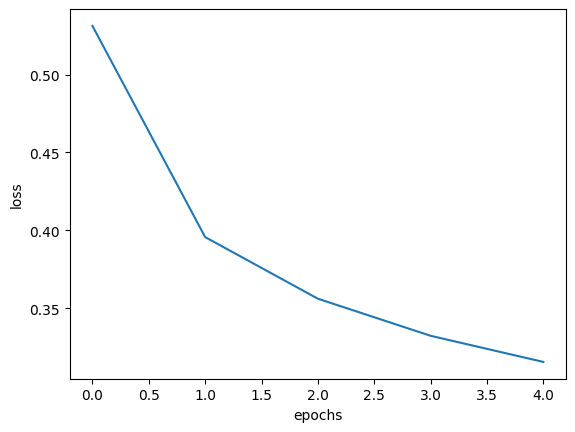

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

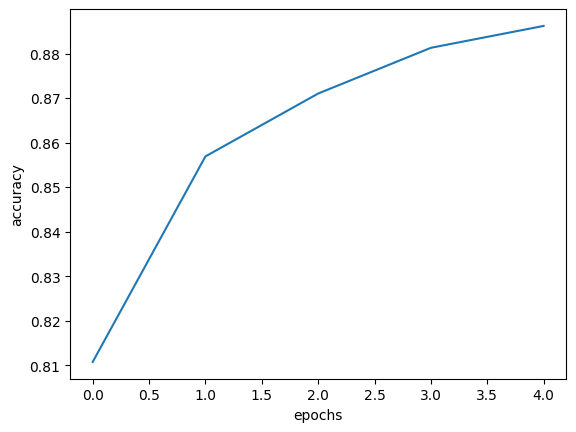

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# 에포크 증가시켜 다시 그리기
model = create_dnn_model()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 20, verbose = 0)

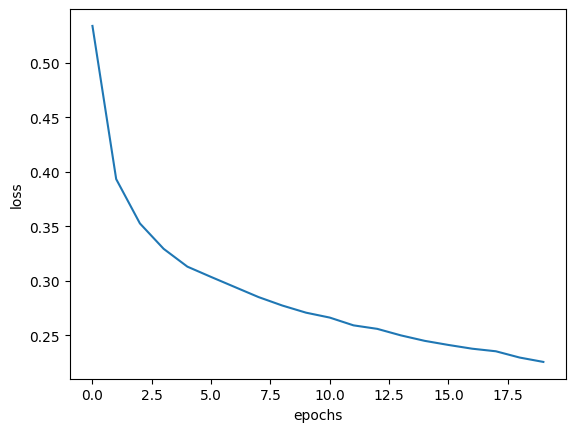

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

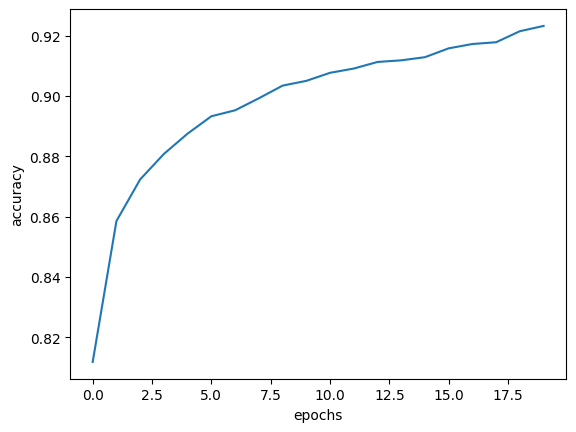

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

### 검증손실

In [ ]:
model = create_dnn_model()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
# 검증 데이터 추가
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 20, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

In [ ]:
print(history)

In [ ]:
print(history.history)

{'loss': [0.5310708284378052, 0.39309048652648926, 0.3553904592990875, 0.33179613947868347, 0.31678226590156555, 0.30729934573173523, 0.29556921124458313, 0.2880162298679352, 0.278451144695282, 0.26945558190345764, 0.2644752264022827, 0.2574118375778198, 0.2529374361038208, 0.24578261375427246, 0.24086888134479523, 0.2359006553888321, 0.23421290516853333, 0.2308361977338791, 0.22439990937709808, 0.22199632227420807], 'accuracy': [0.8121041655540466, 0.8577499985694885, 0.8724583387374878, 0.879729151725769, 0.8843333125114441, 0.8904791474342346, 0.8936041593551636, 0.8976458311080933, 0.9017916917800903, 0.9053750038146973, 0.9055625200271606, 0.909208357334137, 0.9121249914169312, 0.9128333330154419, 0.9147916436195374, 0.917270839214325, 0.9187291860580444, 0.9209166765213013, 0.9221458435058594, 0.9236458539962769], 'val_loss': [0.4217492640018463, 0.41510242223739624, 0.37017422914505005, 0.3664463758468628, 0.36396488547325134, 0.35509058833122253, 0.37897050380706787, 0.35109829

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


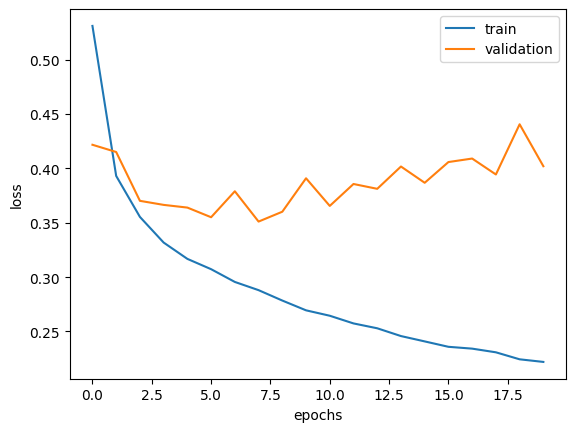

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.531071,0.812104,0.421749,0.853167
1,0.393090,0.857750,0.415102,0.849583
2,0.355390,0.872458,0.370174,0.869333
3,0.331796,0.879729,0.366446,0.872917
4,0.316782,0.884333,0.363965,0.874083
5,0.307299,0.890479,0.355091,0.877667
6,0.295569,0.893604,0.378971,0.872333
7,0.288016,0.897646,0.351098,0.885750
8,0.278451,0.901792,0.360157,0.883417
9,0.269456,0.905375,0.390925,0.876083


In [ ]:
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,loss,accuracy,val_loss,val_accuracy
7,0.288016,0.897646,0.351098,0.88575


In [ ]:
# 최적의 에포크만큼 다시 훈련
model = create_dnn_model()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 8, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

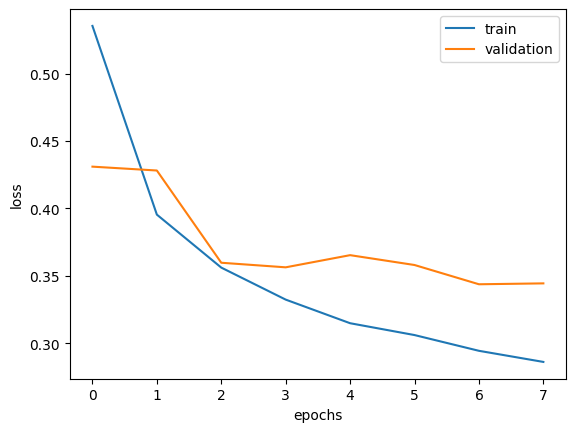

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

### 과대적합 완화

#### 옵티마이저 학습률 조정

In [ ]:
# 옵티마이저 학습률 조정
model = create_dnn_model()
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 20, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

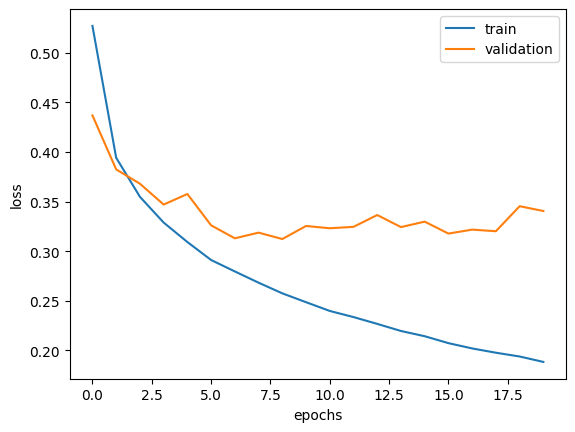

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,loss,accuracy,val_loss,val_accuracy
8,0.257579,0.904042,0.312313,0.890333


In [ ]:
# 최적의 에포크
model = create_dnn_model()
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 9, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

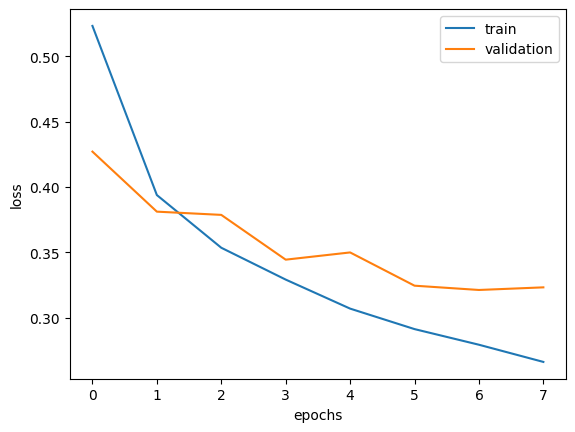

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# 옵티마이저 학습률 변경 => 낮춤
model = create_dnn_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= adam, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 20, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

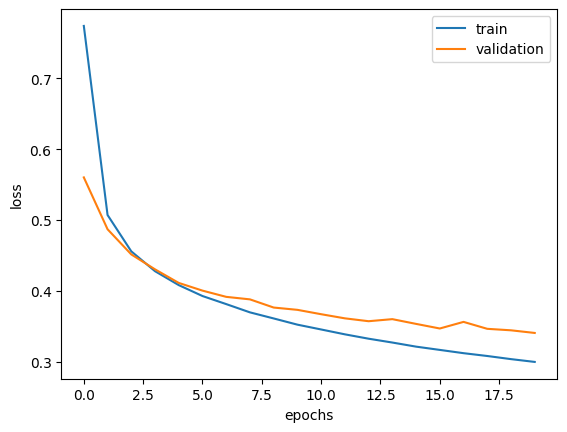

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,loss,accuracy,val_loss,val_accuracy
19,0.299891,0.893479,0.34076,0.878333


In [ ]:
# 옵티마이저 학습률 변경 => 더 낮춤
model = create_dnn_model()
adam = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer= adam, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 20, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

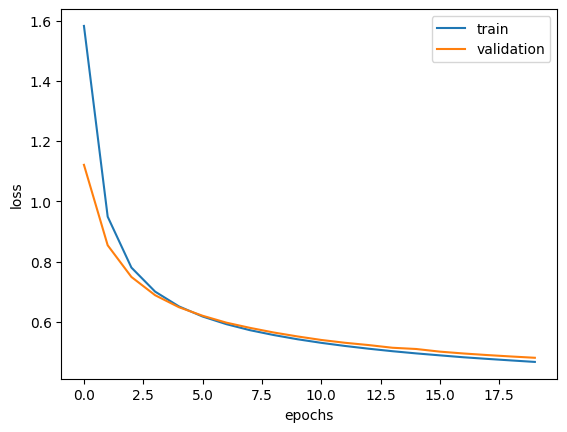

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,loss,accuracy,val_loss,val_accuracy
19,0.466942,0.844333,0.480689,0.838833


#### 드롭아웃

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_59 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_60 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
def create_dnn_model(add_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28,28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  if add_layer:
    model.add(add_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model

In [ ]:
model = create_dnn_model(keras.layers.Dropout(0.3))

In [ ]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_61 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_62 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 드롭아웃 심층신경망
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 20, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

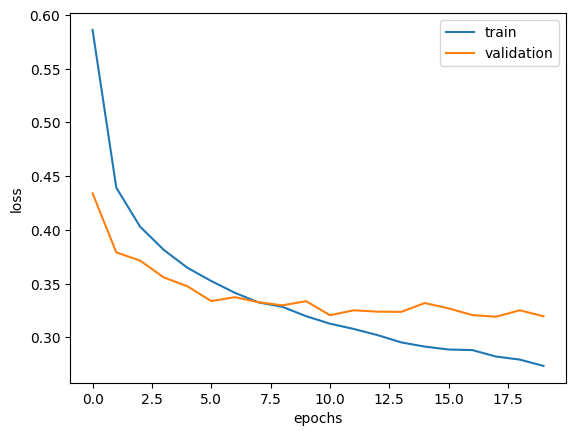

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

### 모델 저장 및 복원

In [ ]:
# 드롭아웃 심층신경망
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 10, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

In [ ]:
model.save_weights('./model_only_params.h5')

In [ ]:
model.save('./model_all.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### 파라미터만 저장된 모델

In [ ]:
# 모델 구조를 먼저 만들어야 함
model = create_dnn_model(keras.layers.Dropout(0.3))

In [ ]:
model.load_weights('model_only_params.h5')

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 10, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

#### 파라미터와 모델 구조 모두 저장한 모델

In [ ]:
model = keras.models.load_model('model_all.h5')

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

375/375 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.8793


[0.3388054668903351, 0.8793333172798157]

### 확률 계산

In [ ]:
model.predict(X_train_scale_val)

375/375 [==============================] - 1s 2ms/step


array([[2.9555689e-09, 1.8779347e-14, 4.3017812e-12, ..., 2.7733009e-07,
        9.9999744e-01, 1.5696063e-10],
       [5.3105282e-06, 1.6105657e-10, 1.1248205e-08, ..., 1.6601749e-08,
        9.9998993e-01, 3.2725761e-10],
       [3.3324860e-10, 7.9414140e-12, 1.4488840e-12, ..., 9.9943912e-01,
        1.0167004e-09, 6.7079895e-07],
       ...,
       [5.1878535e-05, 8.6372278e-09, 1.0052480e-07, ..., 3.7914535e-06,
        9.9993163e-01, 1.7750452e-06],
       [1.1703673e-06, 2.9343441e-14, 3.7108418e-08, ..., 4.5090615e-11,
        9.9999875e-01, 6.2514712e-13],
       [1.4883311e-01, 2.8172599e-07, 2.2346741e-03, ..., 2.2351975e-02,
        7.8938983e-06, 4.3390954e-01]], dtype=float32)

In [ ]:
model.predict(X_train_scale_val)[0]

375/375 [==============================] - 1s 2ms/step


array([2.9555689e-09, 1.8779347e-14, 4.3017812e-12, 6.5337102e-12,
       4.1266528e-11, 2.2359191e-06, 1.0693773e-12, 2.7733009e-07,
       9.9999744e-01, 1.5696063e-10], dtype=float32)

In [ ]:
y_train_val_pred = np.argmax(model.predict(X_train_scale_val), axis = 1)

375/375 [==============================] - 1s 2ms/step


In [ ]:
y_train_val_pred

array([8, 8, 7, ..., 8, 8, 9])

In [ ]:
# Label	Description
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

In [ ]:
np.mean(y_train_val == y_train_val_pred)

0.8793333333333333

### 콜백

#### 체크포인트

In [ ]:
# 드롭아웃 심층신경망
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
# 체크포인트 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_model.h5', save_best_only=True)
# 훈련
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 20, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val),
                    callbacks = [checkpoint_cb])

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

375/375 [==============================] - 1s 3ms/step - loss: 0.3223 - accuracy: 0.8846


[0.3223174810409546, 0.8845833539962769]

In [ ]:
# 이렇게 평가해야 함
model = keras.models.load_model('best_model.h5')

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

375/375 [==============================] - 1s 2ms/step - loss: 0.3178 - accuracy: 0.8862


[0.3178284764289856, 0.8861666917800903]

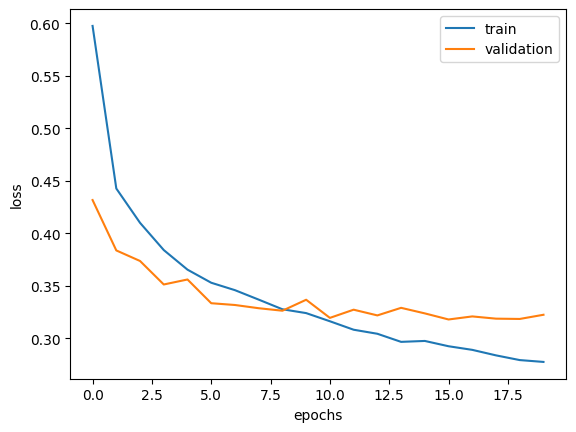

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,loss,accuracy,val_loss,val_accuracy
15,0.292315,0.891312,0.317828,0.886167


#### 조기종료

In [ ]:
# 드롭아웃 심층신경망
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
# 체크포인트 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_model.h5', save_best_only=True)
# 조기종료 콜백
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
# 훈련
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 20, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val),
                    callbacks = [checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print(early_stopping_cb.stopped_epoch)

7


In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

375/375 [==============================] - 1s 3ms/step - loss: 0.3376 - accuracy: 0.8787


[0.3375775218009949, 0.8786666393280029]

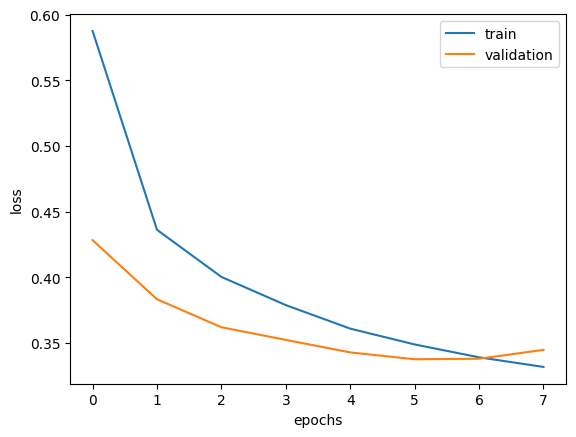

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,loss,accuracy,val_loss,val_accuracy
5,0.348835,0.871604,0.337578,0.878667


In [ ]:
# 최종평가
# 표준화
X_test_scale = X_test / 255

In [ ]:
model.evaluate(X_test_scale, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3630 - accuracy: 0.8702


[0.36302322149276733, 0.870199978351593]

In [ ]:
# 최적의 에포크
opt_epoch = early_stopping_cb.stopped_epoch - 2 + 1

In [ ]:
# 드롭아웃 심층신경망
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
# 훈련
history = model.fit(X_train_scale, y_train, epochs = opt_epoch, verbose = 0)

In [ ]:
model.evaluate(X_test_scale, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3646 - accuracy: 0.8680


[0.3646480441093445, 0.8679999709129333]

## iris 데이터

In [ ]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# X, y 분할
X = df.drop('species', axis = 1).values
y = df['species'].values

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (150, 4)
y 데이터:  (150,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_label = label_encoder.fit_transform(y)

In [ ]:
print(y)
print(y_label)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

In [ ]:
y = y_label

In [ ]:
# 훈련/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=42)
print("훈련데이터: ", X_train.shape)
print("테스트데이터: ", X_test.shape)

훈련데이터:  (120, 4)
테스트데이터:  (30, 4)


In [ ]:
# 표준화(z점수)
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)
print(X_train_scale[:5])
print(X_test_scale[:5])

[[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]
 [ 1.08589829  0.08570939  0.38585821  0.28921757]
 [-1.23014297  0.75647855 -1.2187007  -1.31260282]
 [-1.7177306   0.30929911 -1.39061772 -1.31260282]]
[[ 0.35451684 -0.58505976  0.55777524  0.02224751]
 [-0.13307079  1.65083742 -1.16139502 -1.17911778]
 [ 2.30486738 -1.0322392   1.8185001   1.49058286]
 [ 0.23261993 -0.36147005  0.44316389  0.4227026 ]
 [ 1.2077952  -0.58505976  0.61508092  0.28921757]]


In [ ]:
# 훈련/검증 데이터 분할
from sklearn.model_selection import train_test_split
X_train_scale_sub, X_train_scale_val, y_train_sub, y_train_val = train_test_split(X_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)
print("훈련전체데이터: ", X_train_scale.shape)
print("훈련서브데이터: ", X_train_scale_sub.shape)
print("검증데이터: ", X_train_scale_val.shape)

훈련전체데이터:  (120, 4)
훈련서브데이터:  (96, 4)
검증데이터:  (24, 4)


### 심층신경망 모델

In [ ]:
def create_dnn_model():
  model = keras.Sequential()
  model.add(keras.layers.Dense(100, activation = 'relu', input_shape = (4, )))
  model.add(keras.layers.Dense(3, activation = 'softmax'))
  return model

In [ ]:
model = create_dnn_model()

In [ ]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 100)               500       
                                                                 
 dense_76 (Dense)            (None, 3)                 303       
                                                                 
Total params: 803 (3.14 KB)
Trainable params: 803 (3.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

### 히스토리

In [ ]:
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 10, verbose = 0)

In [ ]:
print(history)

In [ ]:
print(history.history)

{'loss': [0.933646023273468, 0.8222416043281555, 0.7571561336517334, 0.707175076007843, 0.6661362051963806, 0.6306812167167664, 0.6015127897262573, 0.5736808180809021, 0.5499996542930603, 0.5281941294670105], 'accuracy': [0.6666666865348816, 0.7916666865348816, 0.8125, 0.8125, 0.7916666865348816, 0.8020833134651184, 0.8125, 0.8125, 0.8125, 0.8125]}


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [ ]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy
0,0.933646,0.666667
1,0.822242,0.791667
2,0.757156,0.812500
3,0.707175,0.812500
4,0.666136,0.791667
5,0.630681,0.802083
6,0.601513,0.812500
7,0.573681,0.812500
8,0.550000,0.812500
9,0.528194,0.812500


### 손실곡선

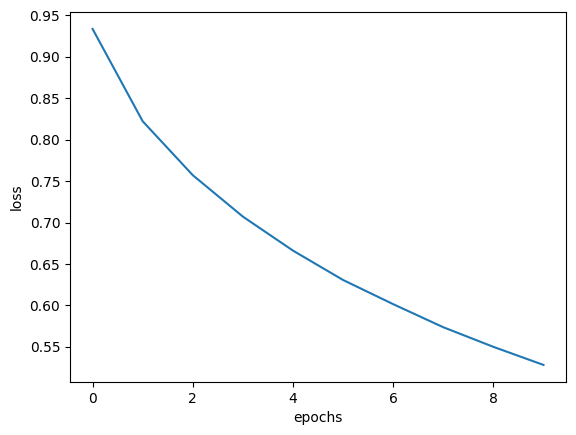

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

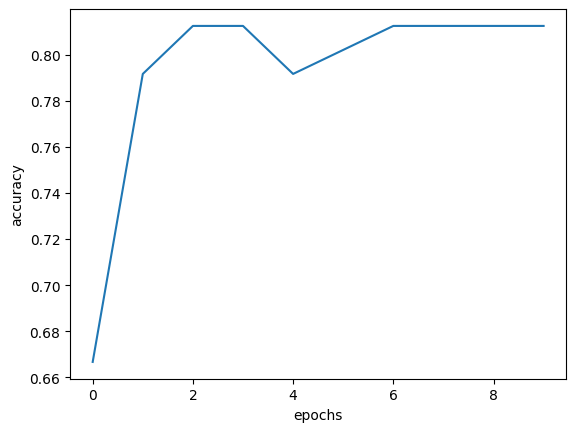

In [ ]:
# 손실곡선 - 정확도
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
model = create_dnn_model()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 100, verbose = 0)

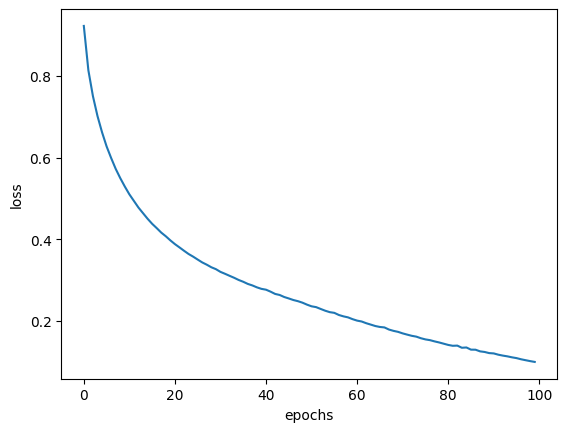

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

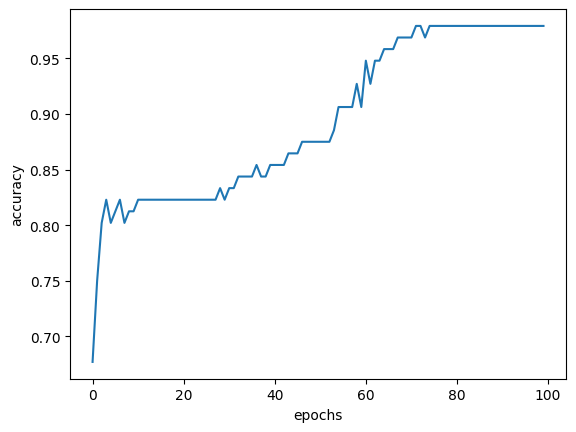

In [ ]:
# 손실곡선 - 정확도
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

### 검증손실

In [ ]:
# 검증손실
model = create_dnn_model()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 500, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
print(history.history)

{'loss': [1.079174280166626, 0.9467935562133789, 0.8682332038879395, 0.8074190020561218, 0.756734311580658, 0.7128397822380066, 0.6766565442085266, 0.6425535082817078, 0.6137834191322327, 0.5873632431030273, 0.5631608366966248, 0.5424256920814514, 0.521574079990387, 0.5041728615760803, 0.48700442910194397, 0.4715803861618042, 0.45785436034202576, 0.4445785582065582, 0.4331173896789551, 0.4207092821598053, 0.40932902693748474, 0.3992382287979126, 0.3892170488834381, 0.37928828597068787, 0.3711282014846802, 0.3621087372303009, 0.3535190522670746, 0.34626635909080505, 0.33820465207099915, 0.3320830762386322, 0.3242368698120117, 0.31853625178337097, 0.3119548261165619, 0.3062259256839752, 0.29967406392097473, 0.29397475719451904, 0.288046270608902, 0.28324997425079346, 0.27777281403541565, 0.27316340804100037, 0.26987224817276, 0.26468902826309204, 0.2580473721027374, 0.25456753373146057, 0.24910473823547363, 0.2449801117181778, 0.24048884212970734, 0.23715759813785553, 0.23301537334918976

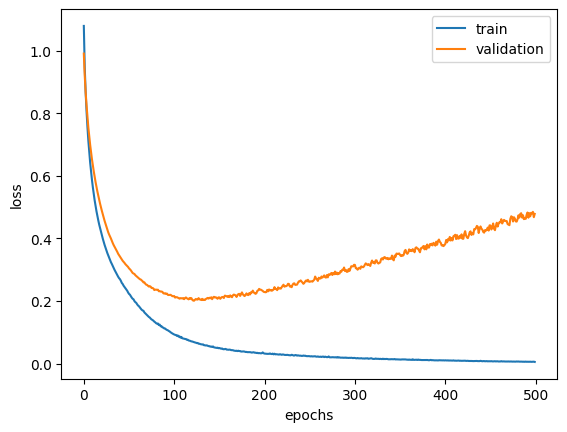

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,loss,accuracy,val_loss,val_accuracy
122,0.068433,0.979167,0.201116,0.875


In [ ]:
# 최적의 에포크로 다시 훈련
model = create_dnn_model()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 123, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

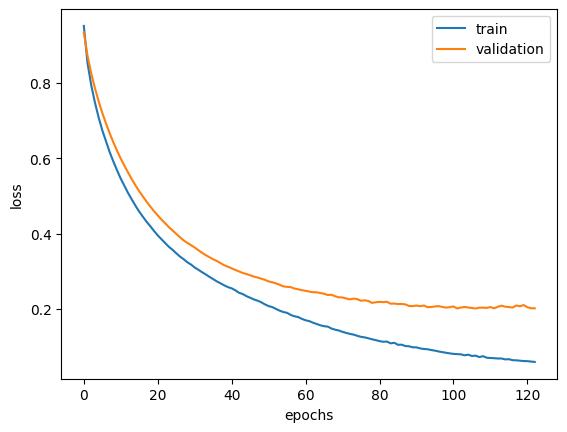

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

### 과대적합 완화

#### 옵티마이저 학습률 조정

In [ ]:
# 옵티마이저 학습률 조정
model = create_dnn_model()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 500, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

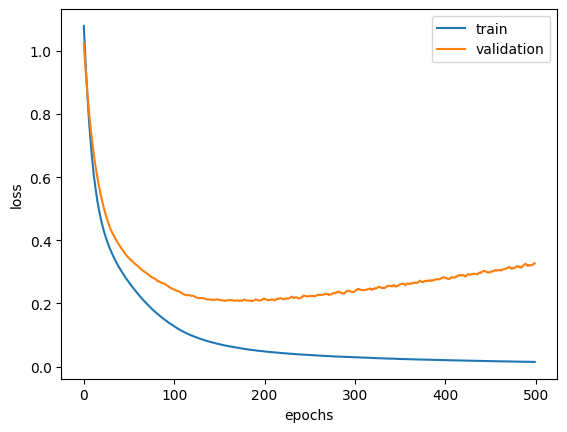

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,loss,accuracy,val_loss,val_accuracy
187,0.05217,0.979167,0.206948,0.875


In [ ]:
# 최적의 에포크로 다시 훈련
model = create_dnn_model()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 188, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

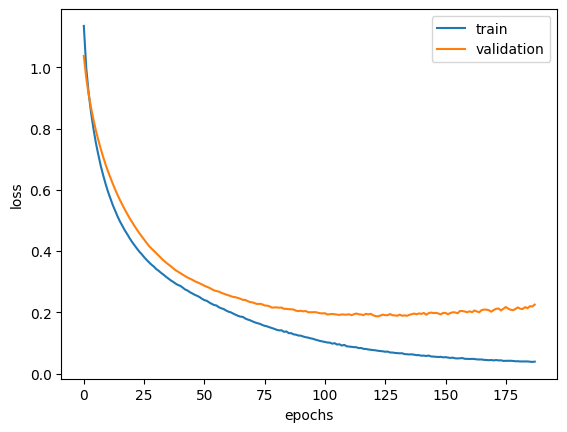

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# 옵티마이저 학습률 조정 => 학습률 낮춤
model = create_dnn_model()
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 500, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

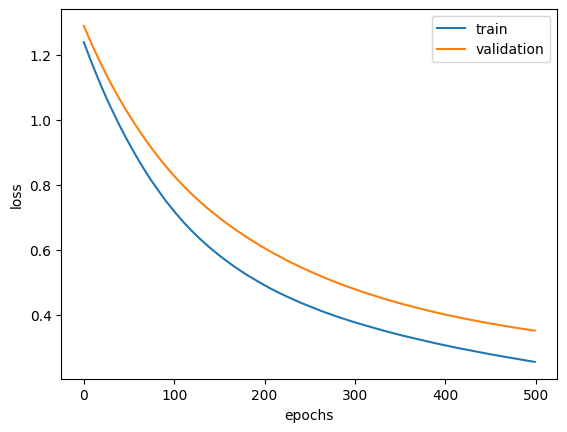

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,loss,accuracy,val_loss,val_accuracy
499,0.254248,0.9375,0.350495,0.833333


#### 드롭아웃

In [ ]:
# 드롭아웃
def create_dnn_model(add_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Dense(100, activation = 'relu', input_shape = (4, )))
  if add_layer:
    model.add(add_layer)
  model.add(keras.layers.Dense(3, activation = 'softmax'))
  return model

In [ ]:
model = create_dnn_model(keras.layers.Dropout(0.3))

In [ ]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 100)               500       
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_90 (Dense)            (None, 3)                 303       
                                                                 
Total params: 803 (3.14 KB)
Trainable params: 803 (3.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 드롭아웃만
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 500, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

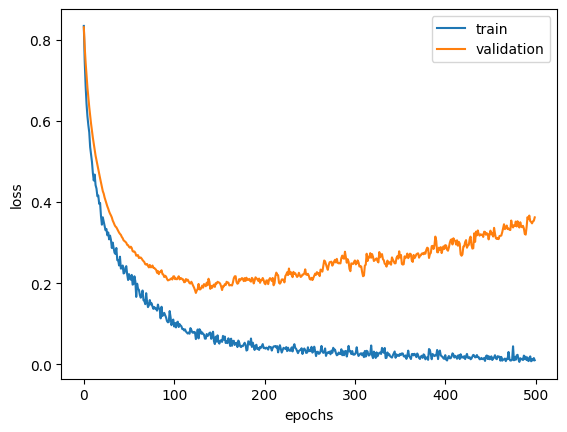

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,loss,accuracy,val_loss,val_accuracy
124,0.062238,0.989583,0.176018,0.875


In [ ]:
# 최적의 에포크로 다시 훈련
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 125, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

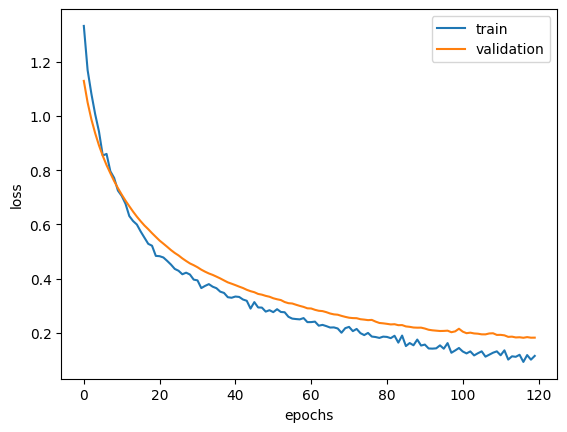

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# 드롭아웃 + 아담
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 500, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

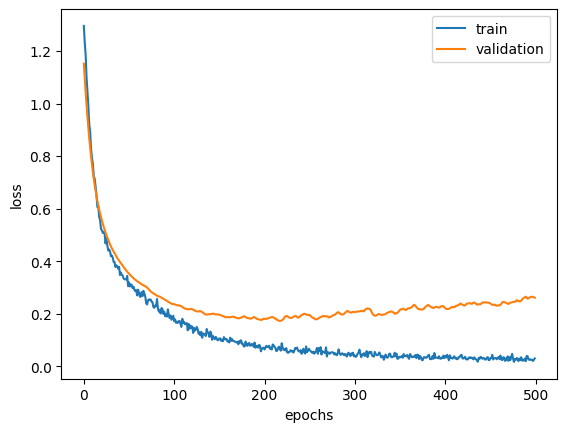

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,loss,accuracy,val_loss,val_accuracy
217,0.065137,0.979167,0.172369,0.916667


In [ ]:
# 최적의 에포크로 다시 훈련
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 218, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

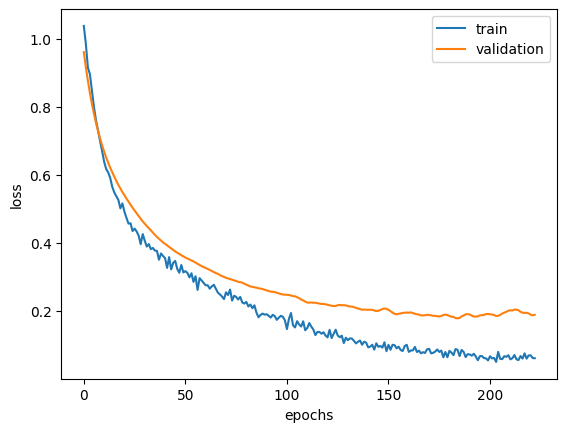

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 41ms/step - loss: 0.1886 - accuracy: 0.9167


[0.18856191635131836, 0.9166666865348816]

### 콜백

In [ ]:
# 체크포인트
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_model.h5',
                                                save_best_only = True)
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 200, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val),
                    callbacks = [checkpoint_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = keras.models.load_model('best_model.h5')
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 164ms/step - loss: 0.2066 - accuracy: 0.8750


[0.20657391846179962, 0.875]

In [ ]:
# 체크포인트 + 조기종료
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_model.h5',
                                                save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2,
                                                  restore_best_weights = True)
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 200, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val),
                    callbacks = [checkpoint_cb, early_stopping_cb])

In [ ]:
print(early_stopping_cb.stopped_epoch)

78


In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 35ms/step - loss: 0.2984 - accuracy: 0.8333


[0.2983674705028534, 0.8333333134651184]

In [ ]:
# 최적의 에포크
opt_epoch = early_stopping_cb.stopped_epoch - 2 + 1

In [ ]:
# 드롭아웃 심층신경망
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
# 훈련
history = model.fit(X_train_scale, y_train, epochs = opt_epoch, verbose = 0)

In [ ]:
model.evaluate(X_test_scale, y_test)

1/1 [==============================] - 0s 442ms/step - loss: 0.1252 - accuracy: 1.0000


[0.12521715462207794, 1.0]

## wine 데이터

In [ ]:
from sklearn import datasets

In [ ]:
data = datasets.load_wine()

In [ ]:
# 특성
data['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
# 타깃
data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [ ]:
df['class'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [ ]:
df['class'].unique()

array([0, 1, 2])

In [ ]:
df['class'].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

In [ ]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [ ]:
# X, y 분할
X = df.drop('class', axis = 1).values
y = df['class'].values

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (178, 13)
y 데이터:  (178,)


In [ ]:
# 훈련/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=42)
print("훈련데이터: ", X_train.shape)
print("테스트데이터: ", X_test.shape)

훈련데이터:  (142, 13)
테스트데이터:  (36, 13)


In [ ]:
# 표준화(z점수)
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)
print(X_train_scale[:5])
print(X_test_scale[:5])

[[ 1.66529275 -0.60840587  1.21896194  1.60540017 -0.16738426  0.80400157
  -0.6916784   1.26722552  1.8775398   3.41947305 -1.65632857 -0.87940904
  -0.24860607]
 [-0.54952506  2.7515415   1.00331502  1.60540017 -0.30437887 -0.78538376
  -1.40123291  2.04959953 -0.87350523 -0.0248012  -0.58463272 -1.25462095
  -0.72992237]
 [-0.74531007 -1.14354109 -0.93750727 -0.28270426 -0.8523573   1.93702874
   1.7467906  -1.00165913  0.58798744 -0.24006834  0.35845962  0.2462267
  -0.24860607]
 [ 0.61294837 -0.61717858  1.00331502  0.87920616 -0.78385999  0.4892718
  -0.90154664  1.18898812  1.17258451  2.8813052  -1.65632857 -1.12955031
  -0.38138298]
 [ 0.11124931 -0.76631462 -0.93750727 -1.15413707 -0.16738426  0.17454204
   0.63748708 -0.68870952 -0.40926638 -0.58449577  0.95860929  0.1350528
   0.94638614]]
[[ 0.80873338  0.63731874  0.71578579 -1.24128036  1.06556722  0.64663669
   1.02724237 -1.54932094  0.08936053  0.01825223  0.01551695  1.06613421
   0.36548715]
 [ 1.50621744  1.4619533

In [ ]:
# 훈련/검증 데이터 분할
from sklearn.model_selection import train_test_split
X_train_scale_sub, X_train_scale_val, y_train_sub, y_train_val = train_test_split(X_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)
print("훈련전체데이터: ", X_train_scale.shape)
print("훈련서브데이터: ", X_train_scale_sub.shape)
print("검증데이터: ", X_train_scale_val.shape)

훈련전체데이터:  (142, 13)
훈련서브데이터:  (113, 13)
검증데이터:  (29, 13)


### 심층신경망 모델

In [ ]:
def create_dnn_model():
  model = keras.Sequential()
  model.add(keras.layers.Dense(50, activation = 'relu', input_shape = (13, )))
  model.add(keras.layers.Dense(3, activation = 'softmax'))
  return model

In [ ]:
model = create_dnn_model()

In [ ]:
model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_107 (Dense)           (None, 50)                700       
                                                                 
 dense_108 (Dense)           (None, 3)                 153       
                                                                 
Total params: 853 (3.33 KB)
Trainable params: 853 (3.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 검증손실

In [ ]:
# 검증손실
model = create_dnn_model()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 500, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

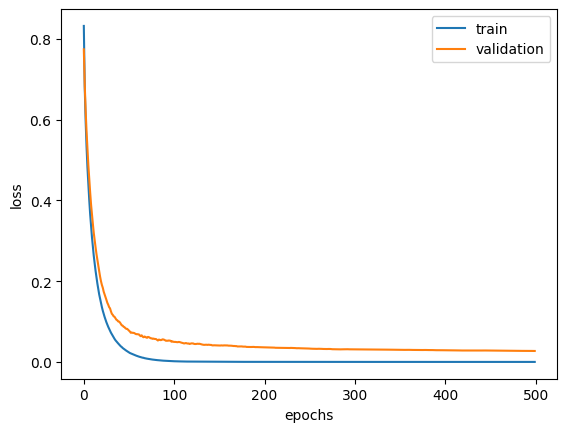

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,loss,accuracy,val_loss,val_accuracy
499,0.000031,1.0,0.027142,1.0


In [ ]:
# 최적의 에포크로 다시 훈련 - 더 많은 에포크로 훈련이 필요
model = create_dnn_model()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = ?, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

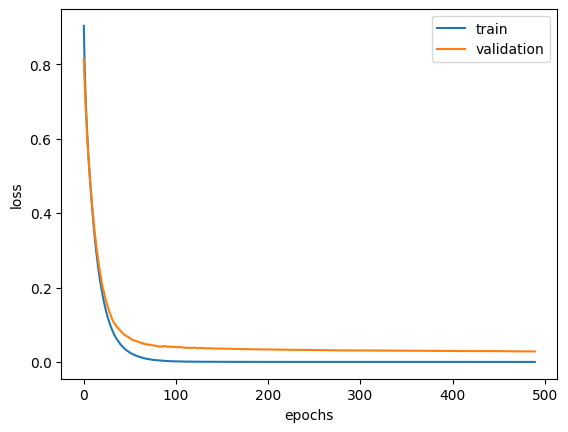

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

#### 옵티마이저 학습률 조정

In [ ]:
# 옵티마이저 학습률 조정
model = create_dnn_model()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 500, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

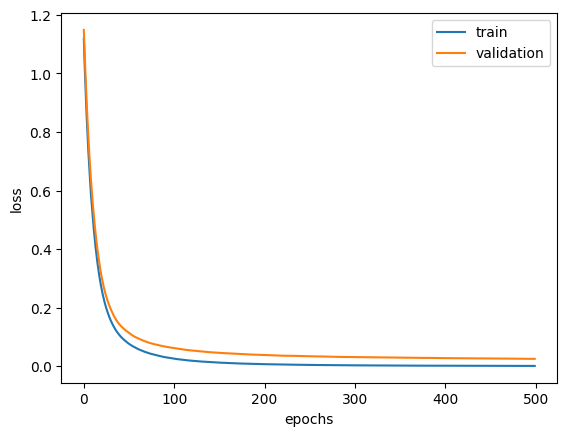

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,loss,accuracy,val_loss,val_accuracy
492,0.000982,1.0,0.025067,1.0


In [ ]:
# 최적의 에포크로 다시 훈련
model = create_dnn_model()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 493, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

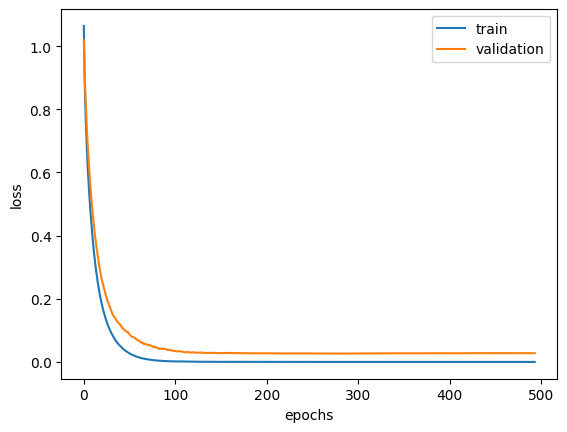

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# 옵티마이저 학습률 조정 => 학습률 변경
model = create_dnn_model()
adam = keras.optimizers.Adam(learning_rate = 0.002)
model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 500, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

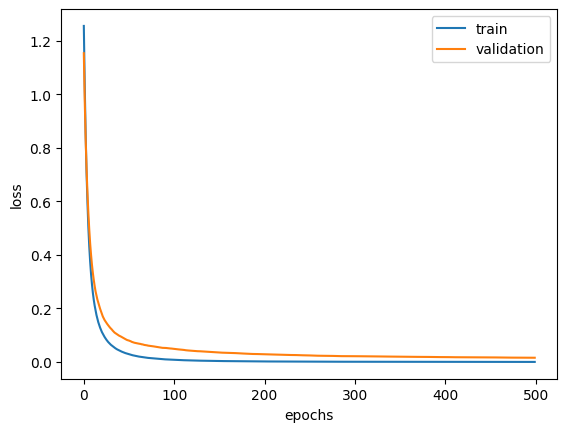

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,loss,accuracy,val_loss,val_accuracy
498,0.000299,1.0,0.015905,1.0


In [ ]:
# 옵티마이저 학습률 조정 => 학습률 변경
model = create_dnn_model()
adam = keras.optimizers.Adam(learning_rate = 0.004)
model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 500, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

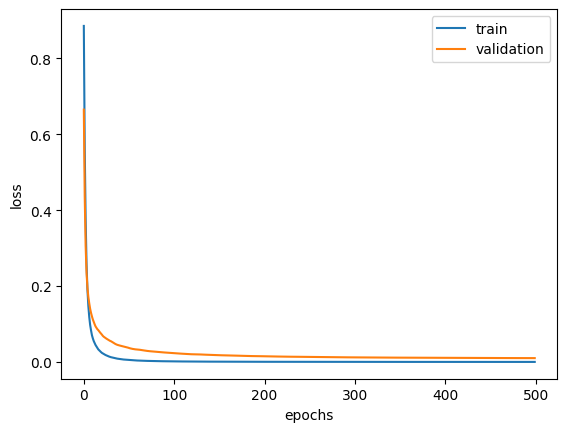

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,loss,accuracy,val_loss,val_accuracy
492,0.000065,1.0,0.010066,1.0


#### 드롭아웃

In [ ]:
# 드롭아웃
def create_dnn_model(add_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Dense(50, activation = 'relu', input_shape = (13, )))
  if add_layer:
    model.add(add_layer)
  model.add(keras.layers.Dense(3, activation = 'softmax'))
  return model

In [ ]:
model = create_dnn_model(keras.layers.Dropout(0.4))

In [ ]:
model.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_121 (Dense)           (None, 50)                700       
                                                                 
 dropout_17 (Dropout)        (None, 50)                0         
                                                                 
 dense_122 (Dense)           (None, 3)                 153       
                                                                 
Total params: 853 (3.33 KB)
Trainable params: 853 (3.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 드롭아웃 + 아담
model = create_dnn_model(keras.layers.Dropout(0.4))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 500, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

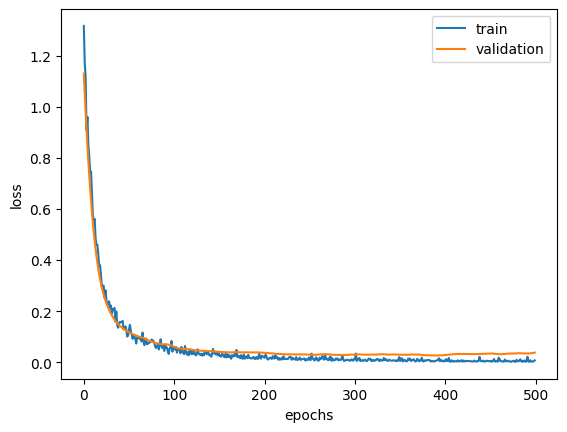

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,loss,accuracy,val_loss,val_accuracy
389,0.005144,1.0,0.026166,1.0


In [ ]:
# 최적의 에포크로 다시 훈련
model = create_dnn_model(keras.layers.Dropout(0.4))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 390, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

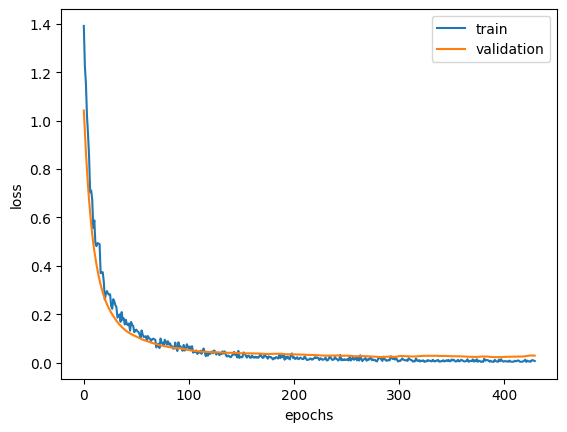

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

### 콜백

In [ ]:
# 체크포인트 + 조기종료
model = create_dnn_model(keras.layers.Dropout(0.4))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_model.h5',
                                                save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3,
                                                  restore_best_weights = True)
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 500, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val),
                    callbacks = [checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print(early_stopping_cb.stopped_epoch)

132


In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,loss,accuracy,val_loss,val_accuracy
129,0.042642,0.99115,0.031303,1.0


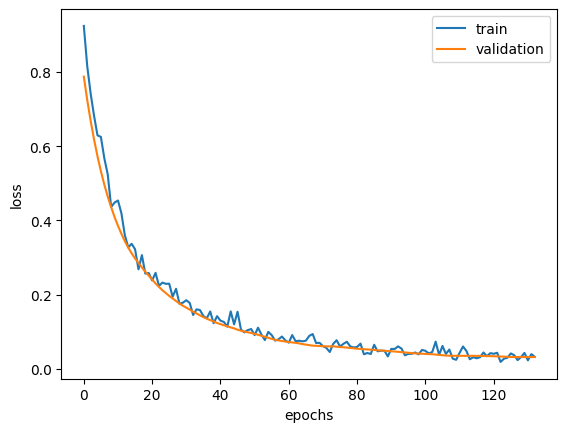

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# 검증 점수 평가
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 39ms/step - loss: 0.0313 - accuracy: 1.0000


[0.031303197145462036, 1.0]

In [ ]:
# 최적의 에포크
opt_epoch = early_stopping_cb.stopped_epoch - 2 + 1

In [ ]:
# 드롭아웃 심층신경망
model = create_dnn_model(keras.layers.Dropout(0.4))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
# 훈련
history = model.fit(X_train_scale, y_train, epochs = opt_epoch, verbose = 0)

In [ ]:
model.evaluate(X_test_scale, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0169 - accuracy: 1.0000


[0.016940509900450706, 1.0]

# 심층 신경망 - 최종 점검 문제

## 유방암데이터

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lsda02/data/breast-cancer-wisconsin.data', header = None)
df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
              'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
# bare_nuclei
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [ ]:
df[df['bare_nuclei'] == "?"]

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [ ]:
df['bare_nuclei'] = df['bare_nuclei'].replace('?', np.nan)

In [ ]:
df['bare_nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', nan, '5', '8', '6'],
      dtype=object)

In [ ]:
df['bare_nuclei'].value_counts(dropna = False)

bare_nuclei
1      402
10     132
2       30
5       30
3       28
8       21
4       19
NaN     16
9        9
7        8
6        4
Name: count, dtype: int64

In [ ]:
df = df.dropna(subset=['bare_nuclei'], axis=0)

In [ ]:
df['bare_nuclei'].value_counts(dropna = False)

bare_nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: count, dtype: int64

In [ ]:
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               683 non-null    int64
 1   clump            683 non-null    int64
 2   cell_size        683 non-null    int64
 3   cell_shape       683 non-null    int64
 4   adhesion         683 non-null    int64
 5   epithlial        683 non-null    int64
 6   bare_nuclei      683 non-null    int64
 7   chromatin        683 non-null    int64
 8   normal_nucleoli  683 non-null    int64
 9   mitoses          683 non-null    int64
 10  class            683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [ ]:
print(df['class'])
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: class, Length: 683, dtype: int64


In [ ]:
df['class'] = label_encoder.fit_transform(df['class'])
print(df['class'])

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: class, Length: 683, dtype: int64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,683.0,1.076720e+06,620644.047655,63375.0,877617.0,1171795.0,1238705.0,13454352.0
clump,683.0,4.442167e+00,2.820761,1.0,2.0,4.0,6.0,10.0
cell_size,683.0,3.150805e+00,3.065145,1.0,1.0,1.0,5.0,10.0
cell_shape,683.0,3.215227e+00,2.988581,1.0,1.0,1.0,5.0,10.0
adhesion,683.0,2.830161e+00,2.864562,1.0,1.0,1.0,4.0,10.0
epithlial,683.0,3.234261e+00,2.223085,1.0,2.0,2.0,4.0,10.0
bare_nuclei,683.0,3.544656e+00,3.643857,1.0,1.0,1.0,6.0,10.0
chromatin,683.0,3.445095e+00,2.449697,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,683.0,2.869693e+00,3.052666,1.0,1.0,1.0,4.0,10.0
mitoses,683.0,1.603221e+00,1.732674,1.0,1.0,1.0,1.0,10.0


In [ ]:
df.columns

Index(['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
       'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [ ]:
# 데이터 분할
# 전체 데이터
X = df.drop(['id', 'class'], axis = 1)
y = df['class']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (683, 9)
y 데이터:  (683,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (546, 9)
test 데이터:  (137, 9)


In [ ]:
# 표준화(z점수)
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)
print(X_train_scale[:5])
print(X_test_scale[:5])

[[-0.51298931 -0.6898418  -0.72955852  0.06158008 -0.544251   -0.68063032
  -0.9722168  -0.59477431 -0.33906568]
 [ 0.93638799  1.9303573   0.25969385  2.51323683  3.13007417 -0.12925917
   0.70762615  0.08390233  0.8869599 ]
 [ 0.21169934 -0.36231691  0.25969385 -0.63889328 -1.00354165 -0.68063032
  -0.9722168  -0.59477431 -0.33906568]
 [ 2.02342097  1.27530753  1.24894622  1.11229011  0.37433029  1.80053987
   0.28766541 -0.59477431  0.27394711]
 [-0.87533364 -0.6898418  -0.72955852 -0.63889328 -0.544251   -0.68063032
  -0.13229532 -0.59477431 -0.33906568]]
[[ 1.29873232 -0.03479202  0.25969385  2.16300015 -0.08496036  1.80053987
  -0.13229532  0.08390233 -0.33906568]
 [ 1.29873232  1.60283242  1.24894622  0.41181676  3.13007417  1.80053987
   1.54754763  1.78059394  3.33901106]
 [-1.23767796 -0.6898418  -0.72955852 -0.63889328 -0.544251   -0.68063032
  -0.13229532 -0.59477431 -0.33906568]
 [-1.23767796 -0.6898418  -0.39980773 -0.2886566  -0.544251   -0.68063032
  -0.13229532 -0.5947

### 심층신경망 모델

In [ ]:
X_train_scale.shape[1]

9

In [ ]:
# 심층신경망 모델
model = keras.Sequential()
model.add(keras.layers.Dense(128, activation = 'relu', input_shape = (X_train_scale.shape[1], )))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_131 (Dense)           (None, 128)               1280      
                                                                 
 dense_132 (Dense)           (None, 64)                8256      
                                                                 
 dense_133 (Dense)           (None, 1)                 65        
                                                                 
Total params: 9601 (37.50 KB)
Trainable params: 9601 (37.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.001)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = 'accuracy')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights=True)

In [ ]:
history = model.fit(X_train_scale, y_train, epochs = 50, validation_split = 0.2,
                    callbacks = [early_stopping_cb])

Epoch 1/50
14/14 [==============================] - 2s 41ms/step - loss: 0.4123 - accuracy: 0.8945 - val_loss: 0.2086 - val_accuracy: 0.9545
Epoch 2/50
14/14 [==============================] - 0s 13ms/step - loss: 0.1567 - accuracy: 0.9748 - val_loss: 0.1236 - val_accuracy: 0.9545
Epoch 3/50
14/14 [==============================] - 0s 7ms/step - loss: 0.0936 - accuracy: 0.9748 - val_loss: 0.1086 - val_accuracy: 0.9545
Epoch 4/50
14/14 [==============================] - 0s 8ms/step - loss: 0.0747 - accuracy: 0.9748 - val_loss: 0.1107 - val_accuracy: 0.9545
Epoch 5/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0667 - accuracy: 0.9748 - val_loss: 0.1161 - val_accuracy: 0.9545
Epoch 6/50
14/14 [==============================] - 0s 7ms/step - loss: 0.0626 - accuracy: 0.9748 - val_loss: 0.1198 - val_accuracy: 0.9545
Epoch 7/50
14/14 [==============================] - 0s 8ms/step - loss: 0.0584 - accuracy: 0.9771 - val_loss: 0.1232 - val_accuracy: 0.9545
Epoch 8/50
14/14 [

In [ ]:
early_stopping_cb.stopped_epoch

12

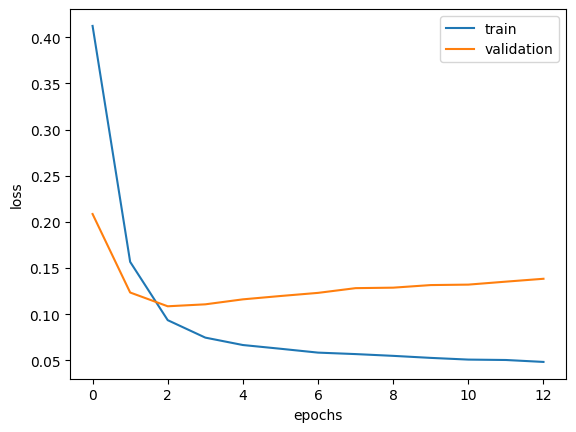

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# 최종평가
# 표준화
X_test_scale

array([[ 1.29873232, -0.03479202,  0.25969385, ..., -0.13229532,
         0.08390233, -0.33906568],
       [ 1.29873232,  1.60283242,  1.24894622, ...,  1.54754763,
         1.78059394,  3.33901106],
       [-1.23767796, -0.6898418 , -0.72955852, ..., -0.13229532,
        -0.59477431, -0.33906568],
       ...,
       [ 0.21169934,  0.62025775,  0.58944464, ...,  1.54754763,
         0.08390233,  3.33901106],
       [-1.23767796, -0.6898418 , -0.72955852, ..., -0.55225606,
        -0.59477431, -0.33906568],
       [-0.51298931, -0.6898418 , -0.72955852, ..., -0.55225606,
        -0.59477431, -0.33906568]])

In [ ]:
# 최적의 에포크
opt_epoch = early_stopping_cb.stopped_epoch - 2 + 1

In [ ]:
# 심층신경망 모델
model = keras.Sequential()
model.add(keras.layers.Dense(128, activation = 'relu', input_shape = (X_train_scale.shape[1], )))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate = 0.001)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = 'accuracy')
# 훈련
history = model.fit(X_train_scale, y_train, epochs = opt_epoch, verbose = 0)

In [ ]:
model.evaluate(X_test_scale, y_test, verbose = 0)

[0.06278244405984879, 0.9781022071838379]

In [ ]:
model.predict(X_test_scale)

5/5 [==============================] - 0s 3ms/step


array([[9.59114432e-01],
       [9.99533653e-01],
       [1.86899953e-04],
       [4.40466189e-04],
       [1.13236754e-04],
       [3.04926280e-03],
       [2.46443989e-04],
       [3.77185196e-02],
       [9.24563527e-01],
       [6.05870970e-04],
       [8.60739237e-05],
       [4.50529013e-04],
       [5.18562784e-03],
       [2.43899040e-03],
       [5.64046323e-01],
       [9.95475292e-01],
       [6.42748899e-04],
       [8.49746525e-01],
       [4.97813476e-03],
       [9.99906361e-01],
       [9.96352553e-01],
       [3.40594025e-03],
       [9.94105875e-01],
       [1.86899953e-04],
       [1.74680271e-03],
       [1.25153834e-04],
       [9.81439412e-01],
       [9.99739885e-01],
       [1.94881519e-04],
       [8.61543536e-01],
       [8.60739237e-05],
       [9.97900665e-01],
       [9.95966792e-01],
       [9.94468868e-01],
       [2.11365594e-04],
       [1.25153834e-04],
       [9.99995112e-01],
       [4.70062951e-04],
       [9.31147993e-01],
       [9.24412429e-01],


In [ ]:
model.predict(X_test_scale).shape

5/5 [==============================] - 0s 3ms/step


(137, 1)

In [ ]:
model.predict(X_test_scale).flatten()

5/5 [==============================] - 0s 2ms/step


array([9.59114432e-01, 9.99533653e-01, 1.86899953e-04, 4.40466189e-04,
       1.13236754e-04, 3.04926280e-03, 2.46443989e-04, 3.77185196e-02,
       9.24563527e-01, 6.05870970e-04, 8.60739237e-05, 4.50529013e-04,
       5.18562784e-03, 2.43899040e-03, 5.64046323e-01, 9.95475292e-01,
       6.42748899e-04, 8.49746525e-01, 4.97813476e-03, 9.99906361e-01,
       9.96352553e-01, 3.40594025e-03, 9.94105875e-01, 1.86899953e-04,
       1.74680271e-03, 1.25153834e-04, 9.81439412e-01, 9.99739885e-01,
       1.94881519e-04, 8.61543536e-01, 8.60739237e-05, 9.97900665e-01,
       9.95966792e-01, 9.94468868e-01, 2.11365594e-04, 1.25153834e-04,
       9.99995112e-01, 4.70062951e-04, 9.31147993e-01, 9.24412429e-01,
       3.13944358e-04, 9.96471584e-01, 9.95734453e-01, 1.75615263e-04,
       1.86899953e-04, 9.86635029e-01, 1.86899953e-04, 9.91795719e-01,
       2.19989030e-04, 9.93960738e-01, 7.13423919e-03, 2.79237545e-04,
       3.92108283e-04, 9.42459047e-01, 8.60739237e-05, 9.95197117e-01,
      

In [ ]:
model.predict(X_test_scale).flatten().shape

5/5 [==============================] - 0s 3ms/step


(137,)

In [ ]:
y_test_pred = model.predict(X_test_scale).flatten()

5/5 [==============================] - 0s 2ms/step


In [ ]:
y_test_bin = [round(x) for x in y_test_pred]

In [ ]:
y_test_bin

[1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0]

In [ ]:
y_test

304    1
149    1
217    0
120    0
314    0
      ..
112    1
84     1
53     1
216    0
563    0
Name: class, Length: 137, dtype: int64

In [ ]:
np.mean(y_test == y_test_bin)

0.9781021897810219

## auto-mpg

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/lsda02/data/auto-mpg.csv', header = None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
# 전처리
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
# ? 데이터 확인
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [ ]:
# ? 를 NaN 으로 변환
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
df['horsepower'].isnull().sum()

6

In [ ]:
# NaN 삭제 후 float 로 변환
df = df.dropna(subset = ['horsepower'], axis = 0)

In [ ]:
df.shape

(392, 9)

In [ ]:
df['horsepower'] = df['horsepower'].astype('float')

In [ ]:
df['origin'].value_counts()

origin
1    245
3     79
2     68
Name: count, dtype: int64

In [ ]:
df['origin'] = df['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [ ]:
df['origin'].value_counts()

origin
USA       245
Japan      79
Europe     68
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns = ['origin'], prefix = '', prefix_sep = '')

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'name', 'Europe', 'Japan', 'USA'],
      dtype='object')

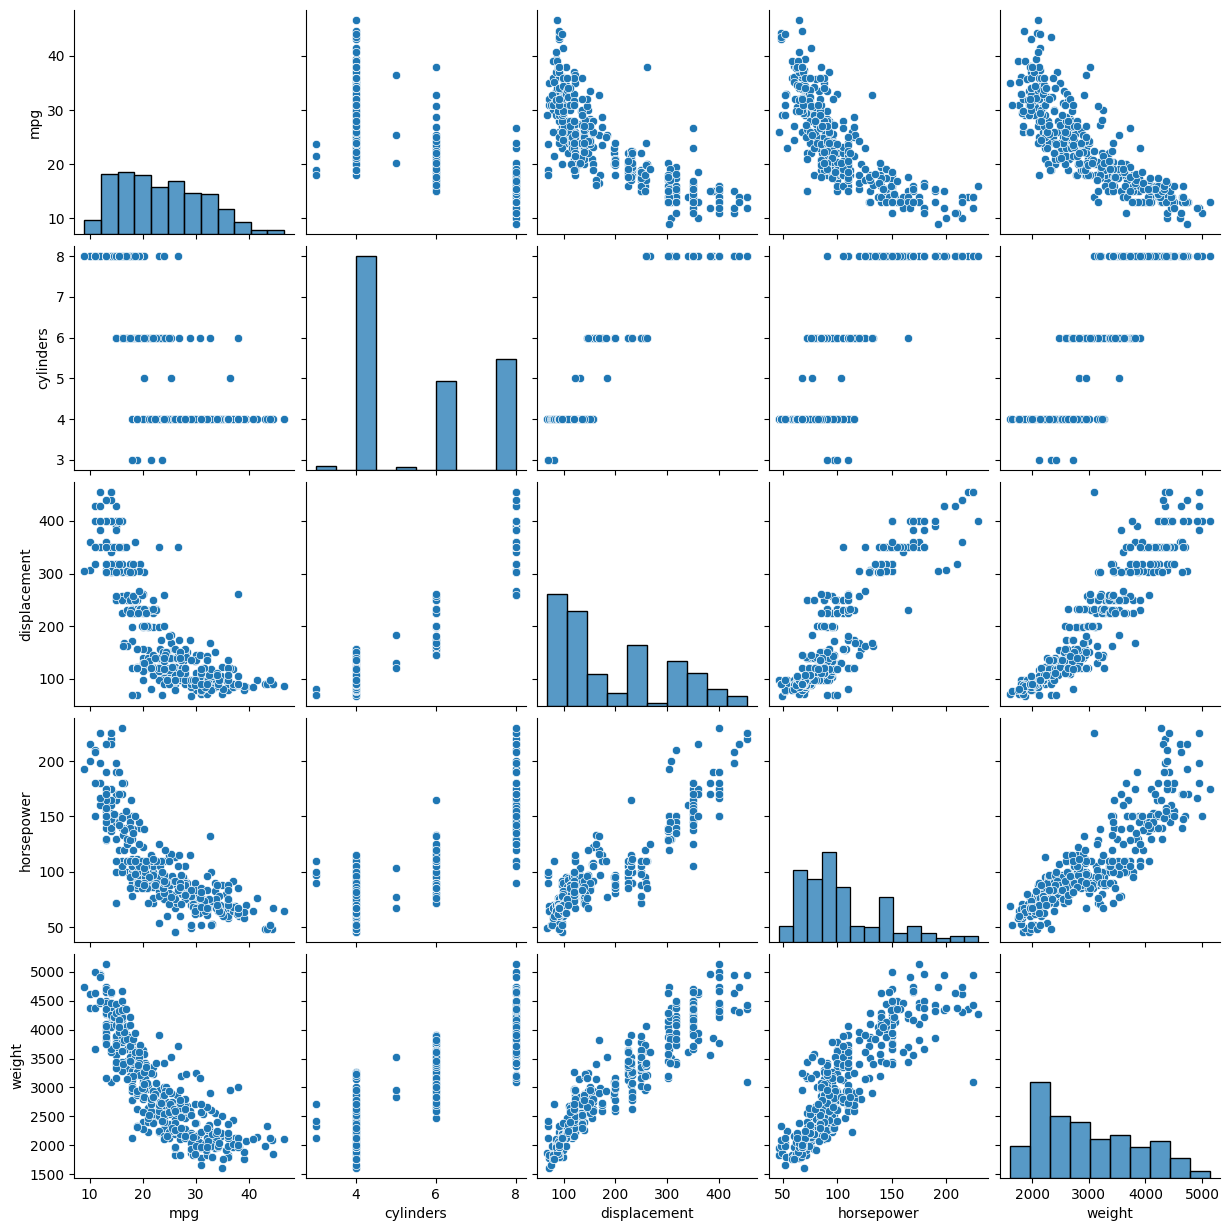

In [ ]:
sns.pairplot(df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']])
plt.show()

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'name', 'Europe', 'Japan', 'USA'],
      dtype='object')

In [ ]:
# 데이터 분할
# 전체 데이터
X = df.drop(['name', 'mpg'], axis = 1)
y = df['mpg']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (392, 9)
y 데이터:  (392,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (313, 9)
test 데이터:  (79, 9)


In [ ]:
X_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'Europe', 'Japan', 'USA'],
      dtype='object')

In [ ]:
X_test.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'Europe', 'Japan', 'USA'],
      dtype='object')

In [ ]:
X_train.drop(['Europe', 'Japan', 'USA'], axis = 1)

,cylinders,displacement,horsepower,weight,acceleration,model_year
260,6,225.0,110.0,3620.0,18.7,78
184,4,140.0,92.0,2572.0,14.9,76
174,6,171.0,97.0,2984.0,14.5,75
64,8,318.0,150.0,4135.0,13.5,72
344,4,86.0,64.0,1875.0,16.4,81
...,...,...,...,...,...,...
72,8,304.0,150.0,3892.0,12.5,72
107,6,232.0,100.0,2789.0,15.0,73
272,4,151.0,85.0,2855.0,17.6,78
352,4,98.0,65.0,2380.0,20.7,81


In [ ]:
X_test.drop(['Europe', 'Japan', 'USA'], axis = 1)

,cylinders,displacement,horsepower,weight,acceleration,model_year
79,4,96.0,69.0,2189.0,18.0,72
276,4,121.0,115.0,2795.0,15.7,78
248,4,91.0,60.0,1800.0,16.4,78
56,4,91.0,70.0,1955.0,20.5,71
393,4,140.0,86.0,2790.0,15.6,82
...,...,...,...,...,...,...
366,6,225.0,85.0,3465.0,16.6,81
83,4,98.0,80.0,2164.0,15.0,72
115,8,350.0,145.0,4082.0,13.0,73
3,8,304.0,150.0,3433.0,12.0,70


In [ ]:
# 표준화(z점수)
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train.drop(['Europe', 'Japan', 'USA'], axis = 1))
X_train_scale = standard.transform(X_train.drop(['Europe', 'Japan', 'USA'], axis = 1))
X_test_scale = standard.transform(X_test.drop(['Europe', 'Japan', 'USA'], axis = 1))
print(X_train_scale[:5])
print(X_test_scale[:5])

[[ 0.30486156  0.28457757  0.14142863  0.75480297  1.1217589   0.49452752]
 [-0.87318372 -0.53588042 -0.32949862 -0.49312922 -0.22893966 -0.0572982 ]
 [ 0.30486156 -0.23665456 -0.19868549 -0.00252992 -0.37111846 -0.33321105]
 [ 1.48290683  1.18225513  1.18793363  1.3680521  -0.72656545 -1.16094962]
 [-0.87318372 -1.05711255 -1.06205212 -1.32309939  0.30423083  1.32226608]]
[[-0.87318372 -0.96058808 -0.931239   -0.94919604  0.87294601 -1.16094962]
 [-0.87318372 -0.71927691  0.27224176 -0.2275864   0.05541793  0.49452752]
 [-0.87318372 -1.00885031 -1.16670262 -1.41240751  0.30423083  0.49452752]
 [-0.87318372 -1.00885031 -0.90507637 -1.22783739  1.76156349 -1.43686248]
 [-0.87318372 -0.53588042 -0.48647437 -0.23354027  0.01987323  1.59817894]]


In [ ]:
X_train_scale = np.concatenate((X_train_scale, X_train[['Europe', 'Japan', 'USA']].values), axis = 1)
X_test_scale = np.concatenate((X_test_scale, X_test[['Europe', 'Japan', 'USA']].values), axis = 1)

### 심층신경망 모델

In [ ]:
X_train_scale.shape[1]

9

In [ ]:
# 심층신경망 모델
model = keras.Sequential()
model.add(keras.layers.Dense(128, activation = 'relu', input_shape = (X_train_scale.shape[1],)))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_137 (Dense)           (None, 128)               1280      
                                                                 
 dense_138 (Dense)           (None, 64)                8256      
                                                                 
 dense_139 (Dense)           (None, 1)                 65        
                                                                 
Total params: 9601 (37.50 KB)
Trainable params: 9601 (37.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
adam = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = adam, loss = 'mae')
history = model.fit(X_train_scale, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 2s 48ms/step - loss: 23.0036 - val_loss: 24.3404
Epoch 2/100
8/8 [==============================] - 0s 15ms/step - loss: 22.1502 - val_loss: 23.4788
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 21.1505 - val_loss: 22.3462
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 19.7734 - val_loss: 20.7668
Epoch 5/100
8/8 [==============================] - 0s 14ms/step - loss: 17.9137 - val_loss: 18.5798
Epoch 6/100
8/8 [==============================] - 0s 13ms/step - loss: 15.6228 - val_loss: 16.1855
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 13.4766 - val_loss: 13.4204
Epoch 8/100
8/8 [==============================] - 0s 19ms/step - loss: 10.8775 - val_loss: 9.9644
Epoch 9/100
8/8 [==============================] - 0s 13ms/step - loss: 7.4666 - val_loss: 5.7849
Epoch 10/100
8/8 [==============================] - 0s 10ms/step - loss: 4.4612 - val_loss: 4.2500
Epoc

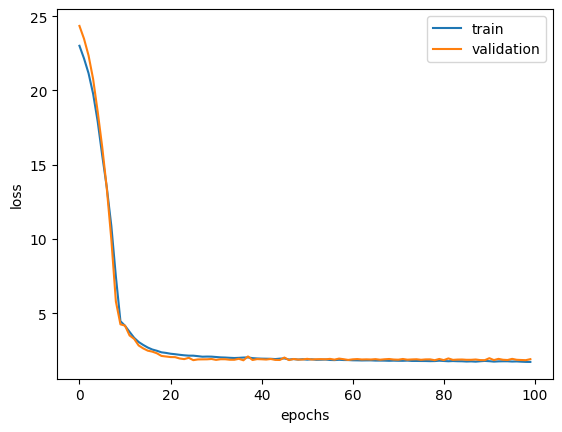

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,loss,val_loss
36,2.012943,1.82829


In [ ]:
opt_epoch = history_df[history_df['val_loss'] == min(history_df['val_loss'])].index[0] + 1
opt_epoch

37

In [ ]:
# 최종평가
# 표준화
X_test_scale

array([[-0.87318372, -0.96058808, -0.931239  , -0.94919604,  0.87294601,
        -1.16094962,  1.        ,  0.        ,  0.        ],
       [-0.87318372, -0.71927691,  0.27224176, -0.2275864 ,  0.05541793,
         0.49452752,  1.        ,  0.        ,  0.        ],
       [-0.87318372, -1.00885031, -1.16670262, -1.41240751,  0.30423083,
         0.49452752,  0.        ,  1.        ,  0.        ],
       [-0.87318372, -1.00885031, -0.90507637, -1.22783739,  1.76156349,
        -1.43686248,  0.        ,  0.        ,  1.        ],
       [-0.87318372, -0.53588042, -0.48647437, -0.23354027,  0.01987323,
         1.59817894,  0.        ,  0.        ,  1.        ],
       [-0.87318372, -0.95093563, -0.77426325, -0.98968239,  0.30423083,
        -0.0572982 ,  0.        ,  1.        ,  0.        ],
       [ 1.48290683,  1.97375578,  1.71118613,  2.09561562, -1.25973593,
        -1.43686248,  0.        ,  0.        ,  1.        ],
       [-0.87318372, -0.95093563, -0.77426325, -0.85869714,  0

In [ ]:
# 최적의 에포크
opt_epoch

37

In [ ]:
# 심층신경망 모델
model = keras.Sequential()
model.add(keras.layers.Dense(128, activation = 'relu', input_shape = (X_train_scale.shape[1],)))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(1))

adam = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = adam, loss = 'mae')
# 훈련
history = model.fit(X_train_scale, y_train, epochs = opt_epoch, verbose = 0)

In [ ]:
model.evaluate(X_test_scale, y_test, verbose = 0)

1.7553633451461792

In [ ]:
model.predict(X_test_scale)

3/3 [==============================] - 0s 4ms/step


array([[26.226002],
       [22.938538],
       [34.78566 ],
       [27.254112],
       [29.18806 ],
       [29.645735],
       [13.075718],
       [29.689478],
       [17.847706],
       [31.254257],
       [14.8493  ],
       [20.759123],
       [17.652279],
       [28.879475],
       [18.077995],
       [30.286648],
       [18.39439 ],
       [33.368256],
       [28.029053],
       [28.750128],
       [19.906563],
       [39.07535 ],
       [36.38448 ],
       [16.948328],
       [29.45105 ],
       [24.513609],
       [21.023928],
       [16.936298],
       [30.117702],
       [23.284468],
       [14.532766],
       [20.437813],
       [19.758049],
       [31.72702 ],
       [13.905016],
       [37.59935 ],
       [14.773954],
       [25.598114],
       [14.368336],
       [11.930256],
       [15.253687],
       [27.513817],
       [35.2278  ],
       [26.505234],
       [14.629406],
       [12.750298],
       [17.479311],
       [32.41278 ],
       [23.692558],
       [30.64891 ],


In [ ]:
model.predict(X_test_scale).flatten()

3/3 [==============================] - 0s 4ms/step


array([26.226002, 22.938538, 34.78566 , 27.254112, 29.18806 , 29.645735,
       13.075718, 29.689478, 17.847706, 31.254257, 14.8493  , 20.759123,
       17.652279, 28.879475, 18.077995, 30.286648, 18.39439 , 33.368256,
       28.029053, 28.750128, 19.906563, 39.07535 , 36.38448 , 16.948328,
       29.45105 , 24.513609, 21.023928, 16.936298, 30.117702, 23.284468,
       14.532766, 20.437813, 19.758049, 31.72702 , 13.905016, 37.59935 ,
       14.773954, 25.598114, 14.368336, 11.930256, 15.253687, 27.513817,
       35.2278  , 26.505234, 14.629406, 12.750298, 17.479311, 32.41278 ,
       23.692558, 30.64891 , 13.583216, 24.59567 , 23.428293, 34.512154,
       24.996555, 15.217566, 18.382618, 18.136723, 22.58902 , 25.33515 ,
       12.835876, 18.944336, 23.127188, 22.073484, 26.969524, 26.635359,
       25.242558, 29.962868, 20.026073, 13.525066, 23.65117 , 12.62697 ,
       23.954884, 29.720898, 24.3186  , 26.496605, 14.067869, 15.830761,
       27.053988], dtype=float32)

In [ ]:
# 예측
y_test_pred = model.predict(X_test_scale).flatten()

3/3 [==============================] - 0s 4ms/step


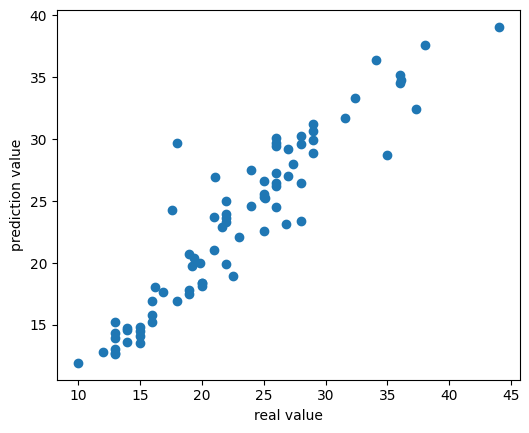

In [ ]:
plt.axes(aspect = 'equal')
plt.scatter(y_test, y_test_pred)
plt.xlabel('real value')
plt.ylabel('prediction value')
plt.show()

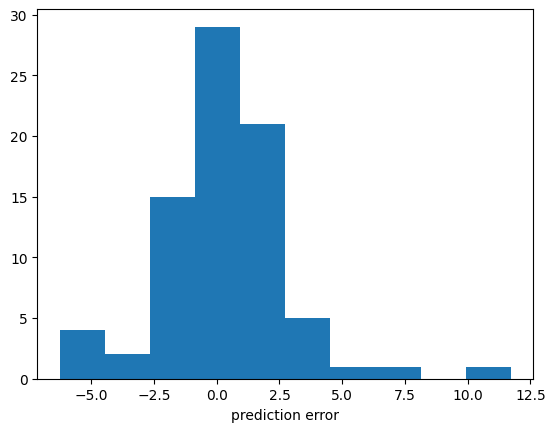

In [ ]:
error = y_test_pred - y_test
plt.hist(error)
plt.xlabel('prediction error')
plt.show()